In [1]:
import json
from pandas.io.json import json_normalize
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set(font_scale=1.5)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [3]:
df = pd.DataFrame()
for filename in glob.glob('./DATABASE/*.json'):
    with open(filename) as json_file:
        data = json.load(json_file)
        new = json_normalize(data['log_monitoring'][0]['contents'])
        df= pd.concat([df, new])

/home/coop/gullaud/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [4]:
ind = np.arange(0, len(df), 1)
ind = pd.Series(ind)
df['index_run'] = ind.values
df = df.set_index('index_run')

In [5]:
df.head()

creation_time                   err_log params.CFL  \
index_run                                                             
0          2019-04-24T13:26:27  [before wrap up\n ok, 0]   00000000   
1          2020-07-31T09:40:10  [before wrap up\n ok, 0]   70000000   
2          2020-04-22T03:09:32  [before wrap up\n ok, 0]   70000000   
3          2019-08-07T09:51:56  [before wrap up\n ok, 0]   00000000   
4          2020-07-20T02:44:33  [before wrap up\n ok, 0]   70000000   

          params.LES_model params.artificial_viscosity_model  \
index_run                                                      
0                     wale                     Colin_species   
1                     wale                     colin_species   
2                     wale                     colin_species   
3                    smago                     Colin_species   
4                     wale                     colin_species   

          params.convection_scheme params.mixture_name params.ncell_group  \
index_run                                                                   
0                             TTGC          KERO_LUCHE                100   
1                             TTGC                C3H8                 60   
2                             TTGC                C3H8                 60   
3                               LW          KERO_LUCHE                100   
4                             TTGC                C3H8                 60   

          params.partitioner  params.reactive_flow  ...  vars.MPI_processes  \
index_run                                           ...                       
0                   parmetis                     1  ...              1120.0   
1                   parmetis                     1  ...               540.0   
2                   parmetis                     1  ...               540.0   
3                   parmetis                     1  ...              1120.0   
4                   parmetis                     1  ...               540.0   

          vars.dimension vars.elapsed_time  vars.final_iteration  \
index_run                                                          
0                    3.0          41567.26                   NaN   
1                    3.0            157.55                 100.0   
2                    3.0          34139.35              244000.0   
3                    3.0          42518.08                   NaN   
4                    3.0          28225.89              205100.0   

          vars.initial_iteration  vars.initial_time  vars.nodes  \
index_run                                                         
0                      2993062.0           0.177500   8043365.0   
1                            0.0           0.000000   3452844.0   
2                       194000.0           0.012229  10205059.0   
3                       566000.0           0.021970   5203109.0   
4                       170727.0           0.009580  11947559.0   

           vars.number_of_probes  vars.physical_time  vars.time_per_ite  
index_run                                                                
0                            3.0                 NaN             0.3364  
1                           72.0            0.000011             1.5336  
2                           73.0            0.014966             0.6825  
3                            NaN                 NaN             0.1567  
4                           73.0            0.011000             0.8208  

[5 rows x 26 columns]

In [6]:
df.columns

Index(['creation_time', 'err_log', 'params.CFL', 'params.LES_model',
       'params.artificial_viscosity_model', 'params.convection_scheme',
       'params.mixture_name', 'params.ncell_group', 'params.partitioner',
       'params.reactive_flow', 'params.real_gas', 'params.smu2',
       'params.solver_type', 'params.two_phase_flow', 'vars.AVBP_version',
       'vars.CPU_time_s', 'vars.MPI_processes', 'vars.dimension',
       'vars.elapsed_time', 'vars.final_iteration', 'vars.initial_iteration',
       'vars.initial_time', 'vars.nodes', 'vars.number_of_probes',
       'vars.physical_time', 'vars.time_per_ite'],
      dtype='object')

# some filling of NaN values

In [7]:
df.isnull().sum()

creation_time                         0
err_log                               0
params.CFL                            0
params.LES_model                      0
params.artificial_viscosity_model     0
params.convection_scheme              0
params.mixture_name                   0
params.ncell_group                    0
params.partitioner                    0
params.reactive_flow                  0
params.real_gas                      14
params.smu2                           0
params.solver_type                    0
params.two_phase_flow                14
vars.AVBP_version                     4
vars.CPU_time_s                      14
vars.MPI_processes                    6
vars.dimension                        3
vars.elapsed_time                    14
vars.final_iteration                 16
vars.initial_iteration                5
vars.initial_time                     5
vars.nodes                            4
vars.number_of_probes                13
vars.physical_time                   16


In [8]:
# un run qui a Nan en nb of probes est un run qui n'a pas de probes
df['vars.number_of_probes'] = df['vars.number_of_probes'].fillna(0.0)
df['params.real_gas'] = df['params.real_gas'].fillna(0.0)
# un run qui n'a pas tourné a 0 en CPU_time ...
df['vars.CPU_time_s'] = df['vars.CPU_time_s'].fillna(0.0)
df['params.two_phase_flow'] = df['params.two_phase_flow'].fillna(0.0)
df['vars.physical_time'] = df['vars.physical_time'].fillna(0.0)
df['vars.elapsed_time'] = df['vars.elapsed_time'].fillna(0.0)
df['vars.final_iteration'] = df['vars.final_iteration'].fillna(0.0)
df['vars.initial_time'] = df['vars.initial_time'].fillna(0.0)

In [9]:
# si LES = no alors on remplace par DNS.
df['params.LES_model'] = df['params.LES_model'].apply(lambda x: 'DNS' if x=='no' else x )

In [10]:
# traitement de la redondance Colin_species vs colin_species
df['params.artificial_viscosity_model'] = df['params.artificial_viscosity_model'].apply(lambda x: 'colin_species' if x == 'Colin_species' else x)

In [11]:
df.isnull().sum()

creation_time                         0
err_log                               0
params.CFL                            0
params.LES_model                      0
params.artificial_viscosity_model     0
params.convection_scheme              0
params.mixture_name                   0
params.ncell_group                    0
params.partitioner                    0
params.reactive_flow                  0
params.real_gas                       0
params.smu2                           0
params.solver_type                    0
params.two_phase_flow                 0
vars.AVBP_version                     4
vars.CPU_time_s                       0
vars.MPI_processes                    6
vars.dimension                        3
vars.elapsed_time                     0
vars.final_iteration                  0
vars.initial_iteration                5
vars.initial_time                     0
vars.nodes                            4
vars.number_of_probes                 0
vars.physical_time                    0


In [12]:
df = df.dropna(subset=['vars.nodes'])

In [13]:
df['mesh_cells'] = df['vars.nodes'].apply(lambda x : int(x/3))

In [14]:
df = df.dropna(subset=['vars.time_per_ite'])

In [15]:
df = df.dropna(subset=['vars.MPI_processes'])

In [16]:
df['vars.nodes'] = df['vars.nodes'].apply(lambda x: int(x))

In [17]:
df['vars.dimension'] = df['vars.dimension'].apply(lambda x: int(x))

In [18]:
df['vars.MPI_processes'] = df['vars.MPI_processes'].apply(lambda x: int(x))

In [19]:
df['vars.time_per_ite'] = df['vars.time_per_ite'].fillna(0.0)
df['params.ncell_group'] = df['params.ncell_group'].apply(lambda x: int(x))
df['params.smu2'] = df['params.smu2'].apply(lambda x: float(x))

In [20]:
df.dtypes

creation_time                         object
err_log                               object
params.CFL                            object
params.LES_model                      object
params.artificial_viscosity_model     object
params.convection_scheme              object
params.mixture_name                   object
params.ncell_group                     int64
params.partitioner                    object
params.reactive_flow                   int64
params.real_gas                      float64
params.smu2                          float64
params.solver_type                    object
params.two_phase_flow                float64
vars.AVBP_version                     object
vars.CPU_time_s                      float64
vars.MPI_processes                     int64
vars.dimension                         int64
vars.elapsed_time                    float64
vars.final_iteration                 float64
vars.initial_iteration               float64
vars.initial_time                    float64
vars.nodes

# Separation en deux dataframes

## creation de deux dataframe, un pour le setup, un pour le résultat 

On sépare le dataframe en un dataframe de setup du run , majoritairement les parametres lus dans run.params, et un dataframe qui contient plus des valeurs qui sortent du avbp.o

In [21]:
run_setup = ['params.CFL', 'params.LES_model',
       'params.artificial_viscosity_model', 'params.convection_scheme',
       'params.mixture_name', 'params.ncell_group', 'params.partitioner',
       'params.reactive_flow', 'params.real_gas', 'params.smu2',
       'params.solver_type', 'params.two_phase_flow', 'vars.AVBP_version', 'vars.MPI_processes', 'vars.dimension', 
       'vars.nodes', 'vars.number_of_probes']

In [22]:
run_result = ['creation_time', 'err_log','vars.CPU_time_s', 'vars.elapsed_time', 'vars.final_iteration', 'vars.initial_iteration',
       'vars.initial_time', 'vars.physical_time', 'vars.time_per_ite' ]

In [23]:
df_setup = df[run_setup]

In [24]:
df_log = df[run_result]

In [25]:
df_setup.transpose()

index_run                                     0              1   \
params.CFL                              00000000       70000000   
params.LES_model                            wale           wale   
params.artificial_viscosity_model  colin_species  colin_species   
params.convection_scheme                    TTGC           TTGC   
params.mixture_name                   KERO_LUCHE           C3H8   
params.ncell_group                           100             60   
params.partitioner                      parmetis       parmetis   
params.reactive_flow                           1              1   
params.real_gas                                0              0   
params.smu2                                    1              0   
params.solver_type                            ns             ns   
params.two_phase_flow                          0              0   
vars.AVBP_version                          7.3.0          7.6.0   
vars.MPI_processes                          1120            540   
vars.dimension                                 3              3   
vars.nodes                               8043365        3452844   
vars.number_of_probes                          3             72   

index_run                                     2              3   \
params.CFL                              70000000       00000000   
params.LES_model                            wale          smago   
params.artificial_viscosity_model  colin_species  colin_species   
params.convection_scheme                    TTGC             LW   
params.mixture_name                         C3H8     KERO_LUCHE   
params.ncell_group                            60            100   
params.partitioner                      parmetis       parmetis   
params.reactive_flow                           1              1   
params.real_gas                                0              0   
params.smu2                                    0              1   
params.solver_type                            ns             ns   
params.two_phase_flow                          0              0   
vars.AVBP_version                          7.5.0          7.5.0   
vars.MPI_processes                           540           1120   
vars.dimension                                 3              3   
vars.nodes                              10205059        5203109   
vars.number_of_probes                         73              0   

index_run                                     4         5                7   \
params.CFL                              70000000  70000000         00000000   
params.LES_model                            wale       DNS            sigma   
params.artificial_viscosity_model  colin_species     colin  Jameson_species   
params.convection_scheme                    TTGC        LW             TTGC   
params.mixture_name                         C3H8       CH4              AIR   
params.ncell_group                            60        40              140   
params.partitioner                      parmetis  parmetis         parmetis   
params.reactive_flow                           1         1                0   
params.real_gas                                0         0                0   
params.smu2                                    0         0                2   
params.solver_type                            ns        ns               ns   
params.two_phase_flow                          0         0                0   
vars.AVBP_version                          7.5.0     7.5.0            7.6.0   
vars.MPI_processes                           540        36              540   
vars.dimension                                 3         2                3   
vars.nodes                              11947559       202          9205252   
vars.number_of_probes                         73         2               30   

index_run                                8              9   \
params.CFL                         70000000       00000000   
params.LES_model                       

In [26]:
df_setup.head()

params.CFL params.LES_model params.artificial_viscosity_model  \
index_run                                                                 
0           00000000             wale                     colin_species   
1           70000000             wale                     colin_species   
2           70000000             wale                     colin_species   
3           00000000            smago                     colin_species   
4           70000000             wale                     colin_species   

          params.convection_scheme params.mixture_name  params.ncell_group  \
index_run                                                                    
0                             TTGC          KERO_LUCHE                 100   
1                             TTGC                C3H8                  60   
2                             TTGC                C3H8                  60   
3                               LW          KERO_LUCHE                 100   
4                             TTGC                C3H8                  60   

          params.partitioner  params.reactive_flow  params.real_gas  \
index_run                                                             
0                   parmetis                     1              0.0   
1                   parmetis                     1              0.0   
2                   parmetis                     1              0.0   
3                   parmetis                     1              0.0   
4                   parmetis                     1              0.0   

           params.smu2 params.solver_type  params.two_phase_flow  \
index_run                                                          
0                  1.0                 ns                    0.0   
1                  0.0                 ns                    0.0   
2                  0.0                 ns                    0.0   
3                  1.0                 ns                    0.0   
4                  0.0                 ns                    0.0   

          vars.AVBP_version  vars.MPI_processes  vars.dimension  vars.nodes  \
index_run                                                                     
0                     7.3.0                1120               3     8043365   
1                     7.6.0                 540               3     3452844   
2                     7.5.0                 540               3    10205059   
3                     7.5.0                1120               3     5203109   
4                     7.5.0                 540               3    11947559   

           vars.number_of_probes  
index_run                         
0                            3.0  
1                           72.0  
2                           73.0  
3                            0.0  
4                           73.0

In [27]:
df_log.head()

creation_time                   err_log  vars.CPU_time_s  \
index_run                                                                   
0          2019-04-24T13:26:27  [before wrap up\n ok, 0]       46560000.0   
1          2020-07-31T09:40:10  [before wrap up\n ok, 0]          85080.0   
2          2020-04-22T03:09:32  [before wrap up\n ok, 0]       18440000.0   
3          2019-08-07T09:51:56  [before wrap up\n ok, 0]       47620000.0   
4          2020-07-20T02:44:33  [before wrap up\n ok, 0]       15240000.0   

           vars.elapsed_time  vars.final_iteration  vars.initial_iteration  \
index_run                                                                    
0                   41567.26                   0.0               2993062.0   
1                     157.55                 100.0                     0.0   
2                   34139.35              244000.0                194000.0   
3                   42518.08                   0.0                566000.0   
4                   28225.89              205100.0                170727.0   

           vars.initial_time  vars.physical_time  vars.time_per_ite  
index_run                                                            
0                   0.177500            0.000000             0.3364  
1                   0.000000            0.000011             1.5336  
2                   0.012229            0.014966             0.6825  
3                   0.021970            0.000000             0.1567  
4                   0.009580            0.011000             0.8208

In [28]:
df.isnull().sum()

creation_time                        0
err_log                              0
params.CFL                           0
params.LES_model                     0
params.artificial_viscosity_model    0
params.convection_scheme             0
params.mixture_name                  0
params.ncell_group                   0
params.partitioner                   0
params.reactive_flow                 0
params.real_gas                      0
params.smu2                          0
params.solver_type                   0
params.two_phase_flow                0
vars.AVBP_version                    0
vars.CPU_time_s                      0
vars.MPI_processes                   0
vars.dimension                       0
vars.elapsed_time                    0
vars.final_iteration                 0
vars.initial_iteration               0
vars.initial_time                    0
vars.nodes                           0
vars.number_of_probes                0
vars.physical_time                   0
vars.time_per_ite        

# Number of runs depending of the dimension

In [29]:
# calcul de l'efficacité (temps passé par coeur /itération pour calculer un point), on sépare par dimension (2D et 3D)
#df['eff'] = df['vars.time_per_ite']*1000000/df['vars.nodes']
df_3D = df[df['vars.dimension'] == 3]
df_2D = df[df['vars.dimension'] == 2]
df_3D['eff'] = df_3D['vars.time_per_ite']*1000000/df_3D['vars.nodes']
df_2D['eff'] = df_2D['vars.time_per_ite']*1000000/df_2D['vars.nodes']

/home/coop/gullaud/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/coop/gullaud/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Work on error log

We add a column with the error code (to be continued), if the error code is 0, it means that the run is converged.
so we create a column 'CONVERGED' which can take the value 0 or 1.

In [30]:
df['error_code'] = df['err_log'].apply(lambda x: str(x).split(',')[-1][:-1].rstrip())

In [31]:
df['error_code'][0]

' 0'

In [32]:
def conversion(x):
    if x ==' 0':
        return 1
    else:
        return 0

In [33]:
df['converged'] = df['error_code'].apply(conversion)

In [34]:
df['converged']

index_run
0     1
1     1
2     1
3     1
4     1
5     1
7     1
8     1
9     0
11    1
14    0
16    0
17    1
18    1
19    1
23    1
24    1
25    1
26    1
29    1
32    0
34    0
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
Name: converged, dtype: int64

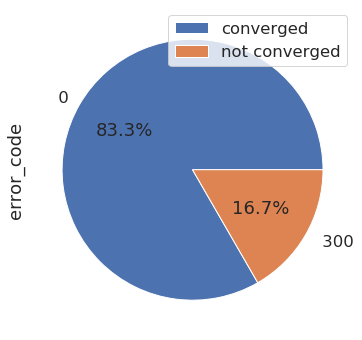

In [35]:
fig = plt.figure(figsize = (10,6))
df['error_code'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
state=['converged', 'not converged']
plt.legend(['converged', 'not converged'])
#plt.legend(loc = 1)

## PCA on setup

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [37]:
df_setup.columns

Index(['params.CFL', 'params.LES_model', 'params.artificial_viscosity_model',
       'params.convection_scheme', 'params.mixture_name', 'params.ncell_group',
       'params.partitioner', 'params.reactive_flow', 'params.real_gas',
       'params.smu2', 'params.solver_type', 'params.two_phase_flow',
       'vars.AVBP_version', 'vars.MPI_processes', 'vars.dimension',
       'vars.nodes', 'vars.number_of_probes'],
      dtype='object')

In [38]:
df_pca = df[run_setup]
df_pca_c = pd.concat([df[run_setup], df['converged']], axis = 1)
df_pca = df_pca_c

In [39]:
df_pca.head()

params.CFL params.LES_model params.artificial_viscosity_model  \
index_run                                                                 
0           00000000             wale                     colin_species   
1           70000000             wale                     colin_species   
2           70000000             wale                     colin_species   
3           00000000            smago                     colin_species   
4           70000000             wale                     colin_species   

          params.convection_scheme params.mixture_name  params.ncell_group  \
index_run                                                                    
0                             TTGC          KERO_LUCHE                 100   
1                             TTGC                C3H8                  60   
2                             TTGC                C3H8                  60   
3                               LW          KERO_LUCHE                 100   
4                             TTGC                C3H8                  60   

          params.partitioner  params.reactive_flow  params.real_gas  \
index_run                                                             
0                   parmetis                     1              0.0   
1                   parmetis                     1              0.0   
2                   parmetis                     1              0.0   
3                   parmetis                     1              0.0   
4                   parmetis                     1              0.0   

           params.smu2 params.solver_type  params.two_phase_flow  \
index_run                                                          
0                  1.0                 ns                    0.0   
1                  0.0                 ns                    0.0   
2                  0.0                 ns                    0.0   
3                  1.0                 ns                    0.0   
4                  0.0                 ns                    0.0   

          vars.AVBP_version  vars.MPI_processes  vars.dimension  vars.nodes  \
index_run                                                                     
0                     7.3.0                1120               3     8043365   
1                     7.6.0                 540               3     3452844   
2                     7.5.0                 540               3    10205059   
3                     7.5.0                1120               3     5203109   
4                     7.5.0                 540               3    11947559   

           vars.number_of_probes  converged  
index_run                                    
0                            3.0          1  
1                           72.0          1  
2                           73.0          1  
3                            0.0          1  
4                           73.0          1

In [40]:
dummies_mixturename = pd.get_dummies(df_pca['params.mixture_name'])
df_pca = pd.concat([df_pca.drop('params.mixture_name', axis = 1), dummies_mixturename], axis=1)

In [41]:
df_pca.head()

params.CFL params.LES_model params.artificial_viscosity_model  \
index_run                                                                 
0           00000000             wale                     colin_species   
1           70000000             wale                     colin_species   
2           70000000             wale                     colin_species   
3           00000000            smago                     colin_species   
4           70000000             wale                     colin_species   

          params.convection_scheme  params.ncell_group params.partitioner  \
index_run                                                                   
0                             TTGC                 100           parmetis   
1                             TTGC                  60           parmetis   
2                             TTGC                  60           parmetis   
3                               LW                 100           parmetis   
4                             TTGC                  60           parmetis   

           params.reactive_flow  params.real_gas  params.smu2  \
index_run                                                       
0                             1              0.0          1.0   
1                             1              0.0          0.0   
2                             1              0.0          0.0   
3                             1              0.0          1.0   
4                             1              0.0          0.0   

          params.solver_type  ...  vars.AVBP_version vars.MPI_processes  \
index_run                     ...                                         
0                         ns  ...              7.3.0               1120   
1                         ns  ...              7.6.0                540   
2                         ns  ...              7.5.0                540   
3                         ns  ...              7.5.0               1120   
4                         ns  ...              7.5.0                540   

           vars.dimension  vars.nodes  vars.number_of_probes  converged  AIR  \
index_run                                                                      
0                       3     8043365                    3.0          1    0   
1                       3     3452844                   72.0          1    0   
2                       3    10205059                   73.0          1    0   
3                       3     5203109                    0.0          1    0   
4                       3    11947559                   73.0          1    0   

           C3H8  CH4  KERO_LUCHE  
index_run                         
0             0    0           1  
1             1    0           0  
2             1    0           0  
3             0    0           1  
4             1    0           0  

[5 rows x 21 columns]

In [42]:
#On supprime les colonnes qui n'ont aucune variabilité.
df_pca = df_pca.drop('params.solver_type', axis = 1)
df_pca = df_pca.drop('params.partitioner', axis = 1)
df_pca = df_pca.drop('params.CFL', axis = 1)

In [43]:
dummies_avbpversion = pd.get_dummies(df_pca['vars.AVBP_version'])
df_pca = pd.concat([df_pca.drop('vars.AVBP_version', axis = 1), dummies_avbpversion], axis=1)

dummies_viscoartif = pd.get_dummies(df_pca['params.artificial_viscosity_model'])
df_pca = pd.concat([df_pca.drop('params.artificial_viscosity_model', axis = 1), dummies_viscoartif], axis=1)
#'params.convection_scheme'
dummies_convection_scheme = pd.get_dummies(df_pca['params.convection_scheme'])
df_pca = pd.concat([df_pca.drop('params.convection_scheme', axis = 1), dummies_convection_scheme], axis=1)
                                    
#'params.LES_model'
dummies_LES_model = pd.get_dummies(df_pca['params.LES_model'])
df_pca = pd.concat([df_pca.drop('params.LES_model', axis = 1), dummies_LES_model], axis=1)                                                       
#                       

In [44]:
df_pca = df_pca.dropna()

In [45]:
# on peut supprimer le nombre de probes si on pense que on nve vuet pas classer par rapport à cette variable
df_pca = df_pca.drop('vars.number_of_probes', axis = 1)

In [46]:
df_pca_c = df_pca
df_pca = df_pca.drop('converged', axis = 1)

In [47]:
print(len(df_pca_c))

30


In [48]:
df_pca.columns

Index(['params.ncell_group', 'params.reactive_flow', 'params.real_gas',
       'params.smu2', 'params.two_phase_flow', 'vars.MPI_processes',
       'vars.dimension', 'vars.nodes', 'AIR', 'C3H8', 'CH4', 'KERO_LUCHE',
       '7.3.0', '7.5.0', '7.6.0', 'Jameson', 'Jameson_species', 'colin',
       'colin_rhou_species', 'colin_species', 'LW', 'TTGC', 'DNS', 'sigma',
       'smago', 'wale'],
      dtype='object')

In [49]:
print(len(df_pca), len(df_pca_c))

30 30


Now we have a dataframe containing only numerical values, with no null values.

In [50]:
# we can look at what features have the most standard deviation --> it yields vars.nodes, MPI_processes, 
#number of probes () but number of probes we know that is not really relevant.
df_pca.std().sort_values()

params.real_gas          0.000000e+00
params.two_phase_flow    0.000000e+00
colin_rhou_species       1.825742e-01
Jameson_species          2.537081e-01
Jameson                  3.457459e-01
KERO_LUCHE               3.790490e-01
7.3.0                    4.068381e-01
sigma                    4.068381e-01
smago                    4.068381e-01
wale                     4.068381e-01
AIR                      4.068381e-01
params.reactive_flow     4.068381e-01
7.6.0                    4.497764e-01
colin_species            4.660916e-01
C3H8                     4.660916e-01
CH4                      4.794633e-01
DNS                      4.982729e-01
7.5.0                    5.074163e-01
vars.dimension           5.074163e-01
colin                    5.074163e-01
LW                       5.074163e-01
TTGC                     5.074163e-01
params.smu2              8.172002e-01
params.ncell_group       4.002873e+01
vars.MPI_processes       4.085145e+02
vars.nodes               3.653209e+06
dtype: float

In [51]:
#we create an instance of PCA: we want to determine how many PCA components
#allow to keep 80 % of the standard deviation of the data
pca = PCA(n_components = 7)
# standardScaler, for each variable, withdraws the mean value and divides by std()
scaler = StandardScaler()
scaler.fit(df_pca)
scaled_data = scaler.transform(df_pca)
scaled_data

array([[ 0.5928798 ,  0.5       ,  0.        ,  0.53933088,  0.        ,
         1.83892255,  0.93541435,  1.54886365, -0.5       , -0.65465367,
        -0.70710678,  2.23606798,  2.        , -1.06904497, -0.60302269,
        -0.39223227, -0.26726124, -0.93541435, -0.18569534,  1.52752523,
        -1.06904497,  1.06904497, -0.81649658, -0.5       , -0.5       ,
         2.        ],
       [-0.42348557,  0.5       ,  0.        , -0.70527884,  0.        ,
         0.39487289,  0.93541435,  0.27080995, -0.5       ,  1.52752523,
        -0.70710678, -0.4472136 , -0.5       , -1.06904497,  1.6583124 ,
        -0.39223227, -0.26726124, -0.93541435, -0.18569534,  1.52752523,
        -1.06904497,  1.06904497, -0.81649658, -0.5       , -0.5       ,
         2.        ],
       [-0.42348557,  0.5       ,  0.        , -0.70527884,  0.        ,
         0.39487289,  0.93541435,  2.15070406, -0.5       ,  1.52752523,
        -0.70710678, -0.4472136 , -0.5       ,  0.93541435, -0.60302269,
       

In [52]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [53]:
len(pca.explained_variance_ratio_)

7

/home/coop/gullaud/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Standard Deviation kept (%)')

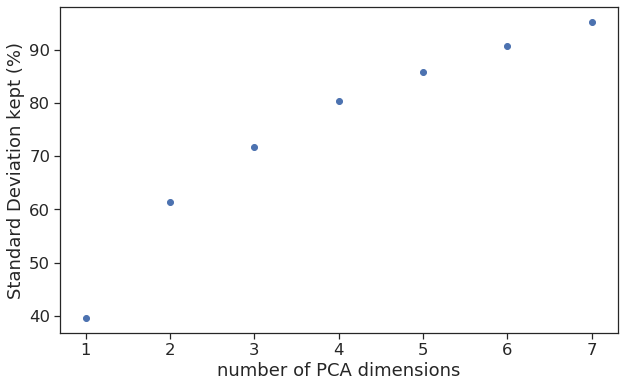

In [54]:
fig = plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,8), 100*pca.explained_variance_ratio_.cumsum())
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('number of PCA dimensions')
ax.set_ylabel('Standard Deviation kept (%)')

#### We now know that we need about 3 or 4 elements in PCA to keep the standard deviation.

## PCA with 2 components

In [55]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)
scores_pca = pca.transform(scaled_data)
#scores_pca
df_comp = pd.concat([df_pca.reset_index(drop = True),
                     pd.DataFrame(scores_pca, 
                     columns = ['Component 1', 'Component 2'])], axis = 1)

In [56]:
df_comp

params.ncell_group  params.reactive_flow  params.real_gas  params.smu2  \
0                  100                     1              0.0          1.0   
1                   60                     1              0.0          0.0   
2                   60                     1              0.0          0.0   
3                  100                     1              0.0          1.0   
4                   60                     1              0.0          0.0   
5                   40                     1              0.0          0.0   
6                  140                     0              0.0          2.0   
7                   40                     1              0.0          0.0   
8                  100                     1              0.0          1.0   
9                  120                     1              0.0          0.0   
10                  40                     1              0.0          0.0   
11                  60                     1              0.0          0.0   
12                 140                     0              0.0          2.0   
13                  40                     1              0.0          0.0   
14                  40                     1              0.0          0.0   
15                  40                     1              0.0          0.0   
16                 140                     0              0.0          2.0   
17                  40                     1              0.0          0.0   
18                 140                     0              0.0          2.0   
19                  40                     1              0.0          0.0   
20                  40                     1              0.0          0.0   
21                  60                     1              0.0          0.0   
22                 140                     0              0.0          2.0   
23                 100                     1              0.0          1.0   
24                  40                     1              0.0          0.0   
25                 100                     1              0.0          1.0   
26                  40                     1              0.0          0.0   
27                  40                     1              0.0          0.0   
28                 140                     0              0.0          2.0   
29                  60                     1              0.0          0.0   

    params.two_phase_flow  vars.MPI_processes  vars.dimension  vars.nodes  \
0                     0.0                1120               3     8043365   
1                     0.0                 540               3     3452844   
2                     0.0                 540               3    10205059   
3                     0.0                1120               3     5203109   
4                     0.0                 540               3    11947559   
5                     0.0                  36               2         202   
6                     0.0                 540               3     9205252   
7                     0.0                  36               2         202   
8                     0.0                1120               3     8043365   
9                     0.0                   8               3       70785   
10                    0.0                   1               2        1602   
11                    0.0                  36               2       32295   
12                    0.0                 540               3     1683039   
13                    0.0                  36               2         202   
14                    0.0                  36               2       10000   
15                    0.0                  36               2         802   
16                    0.0                 540               3     1127586   
17                    0.0                  36               2         202   
18                    0.0                 540               3       20441   
19                    0.0                  36

In [57]:
df_pca.columns

Index(['params.ncell_group', 'params.reactive_flow', 'params.real_gas',
       'params.smu2', 'params.two_phase_flow', 'vars.MPI_processes',
       'vars.dimension', 'vars.nodes', 'AIR', 'C3H8', 'CH4', 'KERO_LUCHE',
       '7.3.0', '7.5.0', '7.6.0', 'Jameson', 'Jameson_species', 'colin',
       'colin_rhou_species', 'colin_species', 'LW', 'TTGC', 'DNS', 'sigma',
       'smago', 'wale'],
      dtype='object')

In [58]:
df_pcacomponents = pd.DataFrame(abs(pca.components_), columns = df_pca.columns)
df_pcacomponents

params.ncell_group  params.reactive_flow  params.real_gas  params.smu2  \
0            0.300026              0.255648     0.000000e+00     0.284938   
1            0.060462              0.263931     5.551115e-17     0.133837   

   params.two_phase_flow  vars.MPI_processes  vars.dimension  vars.nodes  \
0           1.734723e-18            0.217687        0.287424    0.144173   
1           0.000000e+00            0.244810        0.157586    0.307137   

        AIR      C3H8  ...  Jameson_species     colin  colin_rhou_species  \
0  0.255648  0.049073  ...         0.143483  0.287424            0.002556   
1  0.263931  0.154953  ...         0.121834  0.157586            0.019244   

   colin_species        LW      TTGC       DNS     sigma     smago      wale  
0       0.090760  0.220567  0.220567  0.273306  0.255648  0.001191  0.080273  
1       0.394397  0.103628  0.103628  0.174989  0.263931  0.162559  0.315689  

[2 rows x 26 columns]

Text(106.5, 0.5, "['PCA Componant 1', 'PCA Componant 2']")

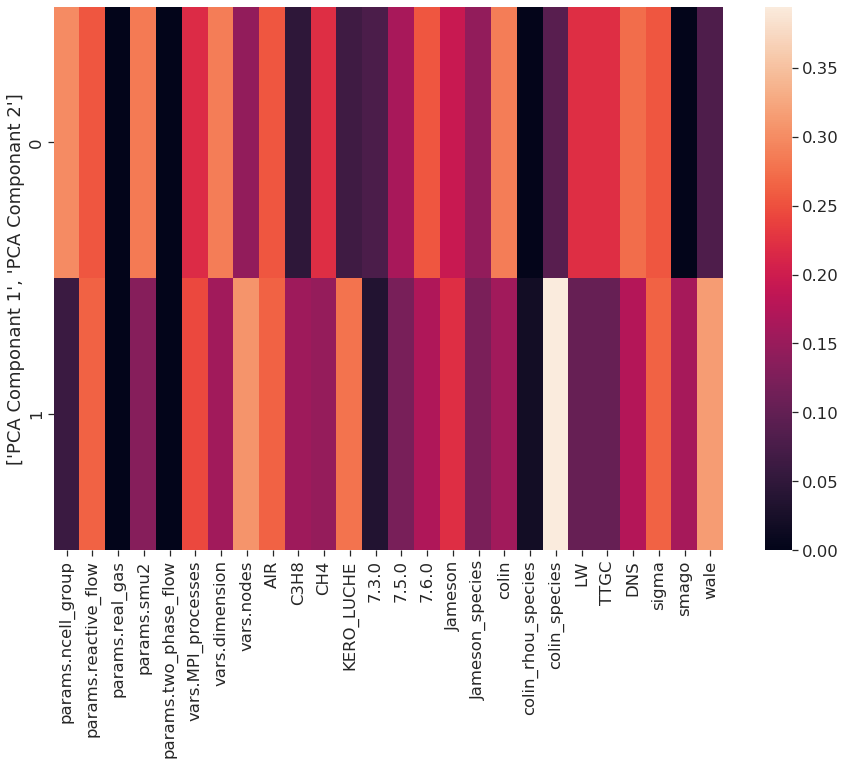

In [59]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1)
sns.heatmap(df_pcacomponents)
ax.set_ylabel(['PCA Componant 1', 'PCA Componant 2'])

In [60]:
np.transpose(pca.components_)

array([[ 3.00026174e-01, -6.04619268e-02],
       [-2.55648421e-01,  2.63930734e-01],
       [-0.00000000e+00, -5.55111512e-17],
       [ 2.84937547e-01, -1.33837142e-01],
       [ 1.73472348e-18, -0.00000000e+00],
       [ 2.17686692e-01,  2.44809681e-01],
       [ 2.87423501e-01,  1.57585591e-01],
       [ 1.44173352e-01,  3.07136882e-01],
       [ 2.55648421e-01, -2.63930734e-01],
       [-4.90731683e-02,  1.54953035e-01],
       [-2.21019829e-01, -1.46471384e-01],
       [ 6.55217893e-02,  2.78017930e-01],
       [-7.72740084e-02,  3.62941051e-02],
       [-1.64468239e-01,  1.21433962e-01],
       [ 2.55442168e-01, -1.69825239e-01],
       [ 1.95533307e-01, -2.21164804e-01],
       [ 1.43482506e-01, -1.21833911e-01],
       [-2.87423501e-01, -1.57585591e-01],
       [-2.55581783e-03,  1.92441979e-02],
       [ 9.07599855e-02,  3.94396888e-01],
       [-2.20567222e-01, -1.03627987e-01],
       [ 2.20567222e-01,  1.03627987e-01],
       [-2.73306328e-01, -1.74989039e-01],
       [ 2.

In [61]:
df_pca.columns[0]

'params.ncell_group'

In [62]:
def biplot(scores_pca, coeff):
    
    x = scores_pca[:,0] # projection on PC1
    print(x)
    y = scores_pca[:,1] # projection on PC2
    print(y)
    
    n = coeff.shape[0] # number of variables
    print(n)
    plt.figure(figsize=(10,8), dpi=100)

    colors = ['g','r','y']
    markers=['o','^','x']

    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0.0, 0.0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.9,
                  linestyle = '-',linewidth = 1.1, overhang=0.2)
        plt.text(coeff[i,0]*1.01, coeff[i,1]*1.01, df_pca.columns[i], 
                 color = 'k', ha = 'center', va = 'center',fontsize=10)
        
    plt.xlabel("PCA Component{}".format(1), size=14)
    plt.ylabel("PCA Component{}".format(2), size=14)
#    limx= int(x.max())
#    limy= int(y.max())
    plt.xlim([-0.4,0.4])
    plt.ylim([-0.4,0.4])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

[ 2.19153535  1.52127693  0.88499733  0.85314812  0.95494044 -3.30513061
  5.27224252 -3.30513061  2.05505047 -0.13043825 -2.9622764  -1.3504639
  4.08606735 -3.30513061 -2.80648502 -3.16862165  4.94800778 -3.30513061
  4.90356866 -3.30513061 -3.18759107 -1.3504639   4.94800778  0.98963299
 -2.80648502  0.85314812 -3.30513061 -3.30510652  4.91581461  1.52127693]
[ 3.81028607  2.40962554  3.61445156  2.92182877  3.76345349 -1.2377317
 -2.01044043 -1.2377317   3.96296024  0.54631799 -0.61009695  0.56216359
 -3.23129183 -1.2377317  -0.74072007 -1.39035456 -2.86335269 -1.2377317
 -2.79583758 -1.2377317  -1.41168751  0.56216359 -2.86335269  2.7691546
 -0.74072007  2.92182877 -1.2377317  -1.23768039 -2.9319348   2.40962554]
26


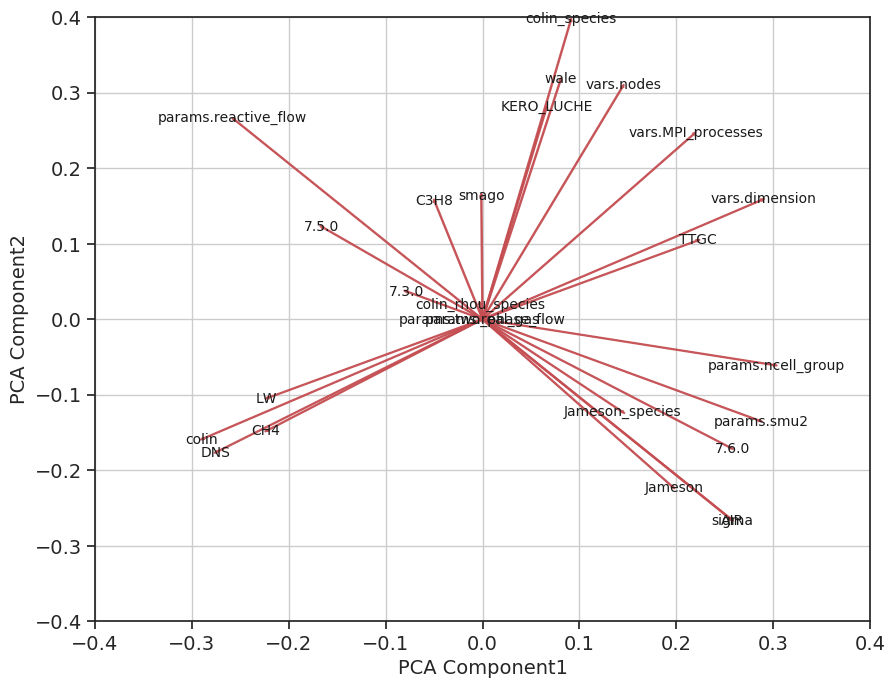

In [63]:
biplot(scores_pca, np.transpose(pca.components_))
plt.show()

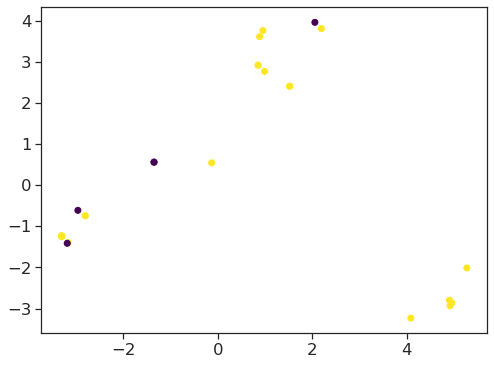

In [64]:
fig = plt.figure(figsize = (8,6))

plt.scatter(scores_pca[:,0], scores_pca[:,1], 
            c = df_pca_c['converged'], cmap = 'viridis')

## Determination du nombre de clusters optimal

In [65]:
from sklearn.cluster import KMeans

In [66]:
# on ne connait pas au préalable le nombre de clusters dans les runs
#on va maintenant montrer que le nombre de cluster optimal est bien 3
# Inertia is the sum of squared distances of samples to their closest cluster centre avec la donnée kmeans.inertia_

distance = []
for i in range(1,6):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scores_pca)
    distance.append(kmeans.inertia_)

Text(0, 0.5, 'kmeans distance')

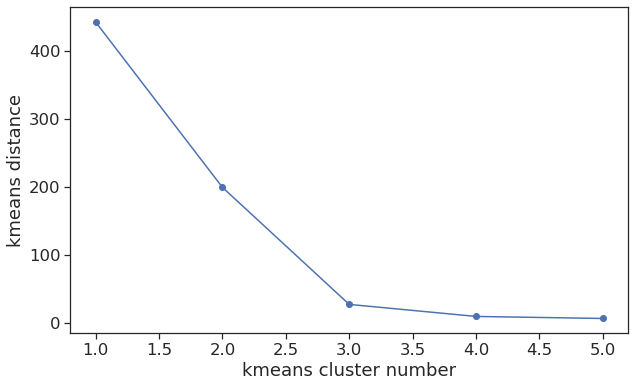

In [67]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1, 1)
plt.plot(range(1,6), distance, '-o')
ax.set_xlabel('kmeans cluster number')
ax.set_ylabel('kmeans distance')

We see that above 3 clusters in the kmeans model doesn't make the distance drop so much, so 3 is the optimal value.
We can deduce here that we have 3 big tendencies in our runs.

## Kmeans on PCA scores with Kmeans = 2

In [68]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scores_pca)
df_comp['k_means_pca'] = kmeans.labels_
print(kmeans.labels_)

[0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0]


In [69]:
df_comp.columns

Index(['params.ncell_group', 'params.reactive_flow', 'params.real_gas',
       'params.smu2', 'params.two_phase_flow', 'vars.MPI_processes',
       'vars.dimension', 'vars.nodes', 'AIR', 'C3H8', 'CH4', 'KERO_LUCHE',
       '7.3.0', '7.5.0', '7.6.0', 'Jameson', 'Jameson_species', 'colin',
       'colin_rhou_species', 'colin_species', 'LW', 'TTGC', 'DNS', 'sigma',
       'smago', 'wale', 'Component 1', 'Component 2', 'k_means_pca'],
      dtype='object')

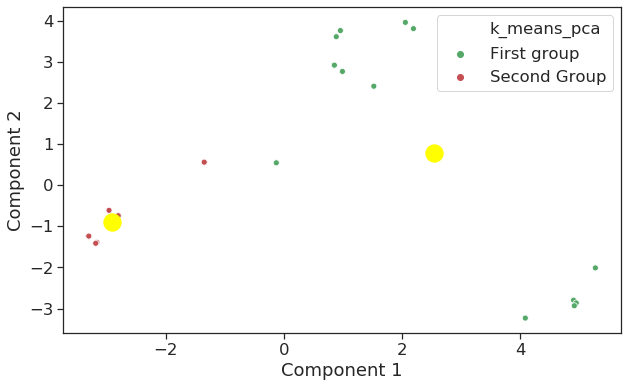

In [70]:
# With 2 components in PCA and kmeans
# Now ce can visualize our data on two components from the PCA, colored by Kmeans
df_comp['k_means_pca'] = df_comp['k_means_pca'].map({0: 'First group', 
                                                     1: 'Second Group'})
fig = plt.figure(figsize = (10,6))
x = df_comp['Component 1']
y = df_comp['Component 2']
sns.scatterplot( x, y, hue = df_comp['k_means_pca'], 
                palette = ['g', 'r'])

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label = 'Centroids')

## Kmeans with 3 clusters 

In [71]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scores_pca)
df_comp['k_means_pca'] = kmeans.labels_
print(kmeans.labels_)

[0 0 0 0 0 1 2 1 0 0 1 1 2 1 1 1 2 1 2 1 1 1 2 0 1 0 1 1 2 0]


In [72]:
kmeans.cluster_centers_.shape

(3, 2)

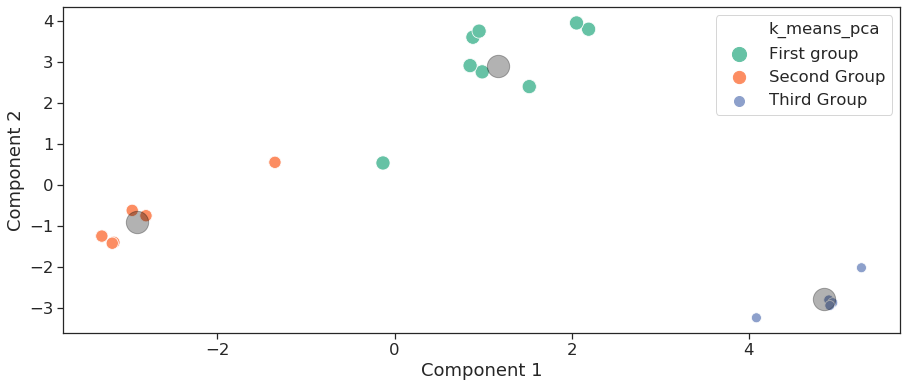

In [73]:
#ax = sns.scatterplot(x="total_bill", y="tip",
#                     hue="size", size="size",
##                     sizes=(20, 200), hue_norm=(0, 7),
#                     legend="full", data=tips)
# With 2 components in PCA and kmeans = 4
# Now ce can visualize our data on two components from the PCA, colored by Kmeans
df_comp['k_means_pca'] = df_comp['k_means_pca'].map({0: 'First group', 
                                                     1: 'Second Group',
                                                    2: 'Third Group'})
fig = plt.figure(figsize = (15,6))
x = df_comp['Component 1']
y = df_comp['Component 2']

cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
#sns.scatterplot( x, y, hue = df_comp['k_means_pca'], 
#                palette = ['g', 'r', 'b'])

sns.scatterplot(x, y, hue = df_comp['k_means_pca'], size = df_comp['k_means_pca'],
                sizes= (100,200), palette="Set2")
#sns.scatterplot(x, y, hue = df_pca_c['converged'], 
#                palette="Set1", alpha = 0.4)
plt.scatter(kmeans.cluster_centers_[0, 0], 
            kmeans.cluster_centers_[0, 1],  
            s= 500, c='black', label = 'Centroids', alpha = 0.3)

plt.scatter(kmeans.cluster_centers_[1, 0], 
            kmeans.cluster_centers_[1, 1], 
            s= 500, c='black', label = 'Centroids', alpha = 0.3)

plt.scatter(kmeans.cluster_centers_[2, 0], 
            kmeans.cluster_centers_[2, 1], 
            s= 500, c='black', label = 'Centroids', alpha = 0.3)

In [74]:
df_process_mean = df_comp.groupby('k_means_pca').mean()
df_process_mean

params.ncell_group  params.reactive_flow  params.real_gas  \
k_means_pca                                                               
First group            86.000000                   1.0              0.0   
Second Group           42.857143                   1.0              0.0   
Third Group           140.000000                   0.0              0.0   

              params.smu2  params.two_phase_flow  vars.MPI_processes  \
k_means_pca                                                            
First group           0.5                    0.0               776.8   
Second Group          0.0                    0.0                31.0   
Third Group           2.0                    0.0               540.0   

              vars.dimension  vars.nodes  AIR      C3H8  ...  \
k_means_pca                                              ...   
First group              3.0   6082514.8  0.0  0.400000  ...   
Second Group             2.0      6415.0  0.0  0.357143  ...   
Third Group              3.0   2248243.0  1.0  0.000000  ...   

              colin_rhou_species  colin_species        LW      TTGC       DNS  \
k_means_pca                                                                     
First group                  0.1            0.9  0.300000  0.700000  0.000000   
Second Group                 0.0            0.0  0.857143  0.142857  0.857143   
Third Group                  0.0            0.0  0.166667  0.833333  0.000000   

              sigma     smago  wale  Component 1  Component 2  
k_means_pca                                                    
First group     0.0  0.400000   0.6     1.169457     2.912953  
Second Group    0.0  0.142857   0.0    -2.912020    -0.888094  
Third Group     1.0  0.000000   0.0     4.845618    -2.782702  

[3 rows x 28 columns]

In [75]:
df_comp2 = df_comp.drop(['params.reactive_flow','params.real_gas', 
                                            'params.two_phase_flow', 'Component 1', 
                                            'Component 2'], axis = 1)

In [76]:
df_process_std = df_comp2.groupby('k_means_pca').std()

In [77]:
dataframe = pd.concat([df_comp2[df_comp2['k_means_pca'] == 'First group'].mean(), 
                       df_comp2[df_comp2['k_means_pca'] == 'First group'].std(),
                       df_comp2[df_comp2['k_means_pca'] == 'Second Group'].mean(), 
                       df_comp2[df_comp2['k_means_pca'] == 'Second Group'].std(),
                       df_comp2[df_comp2['k_means_pca'] == 'Third Group'].mean(), 
                       df_comp2[df_comp2['k_means_pca'] == 'Third Group'].std()], axis = 1) 
dataframe.columns =  ['Mean First group', 'Std First Group', 
                      'Mean Second group', 'Std Second Group',
                      'Mean Third group', 'Std Third Group']
dataframe.sort_values(by ='Mean Third group', ascending = False)

Mean First group  Std First Group  Mean Second group  \
vars.nodes                 6082514.8     3.517816e+06        6415.000000   
vars.MPI_processes             776.8     3.950080e+02          31.000000   
params.ncell_group              86.0     2.319004e+01          42.857143   
vars.dimension                   3.0     0.000000e+00           2.000000   
params.smu2                      0.5     5.270463e-01           0.000000   
sigma                            0.0     0.000000e+00           0.000000   
7.6.0                            0.2     4.216370e-01           0.000000   
AIR                              0.0     0.000000e+00           0.000000   
TTGC                             0.7     4.830459e-01           0.142857   
Jameson                          0.0     0.000000e+00           0.000000   
Jameson_species                  0.0     0.000000e+00           0.000000   
LW                               0.3     4.830459e-01           0.857143   
CH4                              0.1     3.162278e-01           0.642857   
KERO_LUCHE                       0.5     5.270463e-01           0.000000   
7.3.0                            0.2     4.216370e-01           0.285714   
7.5.0                            0.6     5.163978e-01           0.714286   
C3H8                             0.4     5.163978e-01           0.357143   
colin                            0.0     0.000000e+00           1.000000   
colin_rhou_species               0.1     3.162278e-01           0.000000   
colin_species                    0.9     3.162278e-01           0.000000   
DNS                              0.0     0.000000e+00           0.857143   
smago                            0.4     5.163978e-01           0.142857   
wale                             0.6     5.163978e-01           0.000000   

                    Std Second Group  Mean Third group  Std Third Group  
vars.nodes              11484.249214      2.248243e+06     3.460954e+06  
vars.MPI_processes         12.709778      5.400000e+02     0.000000e+00  
params.ncell_group          7.262730      1.400000e+02     0.000000e+00  
vars.dimension              0.000000      3.000000e+00     0.000000e+00  
params.smu2                 0.000000      2.000000e+00     0.000000e+00  
sigma                       0.000000      1.000000e+00     0.000000e+00  
7.6.0                       0.000000      1.000000e+00     0.000000e+00  
AIR                         0.000000      1.000000e+00     0.000000e+00  
TTGC                        0.363137      8.333333e-01     4.082483e-01  
Jameson                     0.000000      6.666667e-01     5.163978e-01  
Jameson_species             0.000000      3.333333e-01     5.163978e-01  
LW                          0.363137      1.666667e-01     4.082483e-01  
CH4                         0.497245      0.000000e+00     0.000000e+00  
KERO_LUCHE                  0.000000      0.000000e+00     0.000000e+00  
7.3.0                       0.468807      0.000000e+00     0.000000e+00  
7.5.0                       0.468807      0.000000e+00     0.000000e+00  
C3H8                        0.497245      0.000000e+00     0.000000e+00  
colin                       0.000000      0.000000e+00     0.000000e+00  
colin_rhou_species          0.000000      0.000000e+00     0.000000e+00  
colin_species               0.000000      0.000000e+00     0.000000e+00  
DNS                         0.363137      0.000000e+00     0.000000e+00  
smago                       0.363137      0.000000e+00     0.000000e+00  
wale                        0.000000      0.000000e+00     0.000000e+00

In [78]:
dataframe = pd.concat([df_comp2[df_comp2['k_means_pca'] == 'First group'].std(), 
             df_comp2[df_comp2['k_means_pca'] == 'Second Group'].std(), 
             df_comp2[df_comp2['k_means_pca'] == 'Third Group'].std()], axis = 1) 
dataframe.columns =  ['First group', 'Second group', 'Third group']
dataframe

First group  Second group   Third group
params.ncell_group  2.319004e+01      7.262730  0.000000e+00
params.smu2         5.270463e-01      0.000000  0.000000e+00
vars.MPI_processes  3.950080e+02     12.709778  0.000000e+00
vars.dimension      0.000000e+00      0.000000  0.000000e+00
vars.nodes          3.517816e+06  11484.249214  3.460954e+06
AIR                 0.000000e+00      0.000000  0.000000e+00
C3H8                5.163978e-01      0.497245  0.000000e+00
CH4                 3.162278e-01      0.497245  0.000000e+00
KERO_LUCHE          5.270463e-01      0.000000  0.000000e+00
7.3.0               4.216370e-01      0.468807  0.000000e+00
7.5.0               5.163978e-01      0.468807  0.000000e+00
7.6.0               4.216370e-01      0.000000  0.000000e+00
Jameson             0.000000e+00      0.000000  5.163978e-01
Jameson_species     0.000000e+00      0.000000  5.163978e-01
colin               0.000000e+00      0.000000  0.000000e+00
colin_rhou_species  3.162278e-01      0.000000  0.000000e+00
colin_species       3.162278e-01      0.000000  0.000000e+00
LW                  4.830459e-01      0.363137  4.082483e-01
TTGC                4.830459e-01      0.363137  4.082483e-01
DNS                 0.000000e+00      0.363137  0.000000e+00
sigma               0.000000e+00      0.000000  0.000000e+00
smago               5.163978e-01      0.363137  0.000000e+00
wale                5.163978e-01      0.000000  0.000000e+00

In [79]:
df_comp2[df_comp2['k_means_pca'] == 'Second Group'].mean()
df_comp2[df_comp2['k_means_pca'] == 'Second Group'].std()

params.ncell_group        7.262730
params.smu2               0.000000
vars.MPI_processes       12.709778
vars.dimension            0.000000
vars.nodes            11484.249214
AIR                       0.000000
C3H8                      0.497245
CH4                       0.497245
KERO_LUCHE                0.000000
7.3.0                     0.468807
7.5.0                     0.468807
7.6.0                     0.000000
Jameson                   0.000000
Jameson_species           0.000000
colin                     0.000000
colin_rhou_species        0.000000
colin_species             0.000000
LW                        0.363137
TTGC                      0.363137
DNS                       0.363137
sigma                     0.000000
smago                     0.363137
wale                      0.000000
dtype: float64

In [80]:
df_comp2[df_comp2['k_means_pca'] == 'Third Group'].mean()
df_comp2[df_comp2['k_means_pca'] == 'Third Group'].std()


params.ncell_group    0.000000e+00
params.smu2           0.000000e+00
vars.MPI_processes    0.000000e+00
vars.dimension        0.000000e+00
vars.nodes            3.460954e+06
AIR                   0.000000e+00
C3H8                  0.000000e+00
CH4                   0.000000e+00
KERO_LUCHE            0.000000e+00
7.3.0                 0.000000e+00
7.5.0                 0.000000e+00
7.6.0                 0.000000e+00
Jameson               5.163978e-01
Jameson_species       5.163978e-01
colin                 0.000000e+00
colin_rhou_species    0.000000e+00
colin_species         0.000000e+00
LW                    4.082483e-01
TTGC                  4.082483e-01
DNS                   0.000000e+00
sigma                 0.000000e+00
smago                 0.000000e+00
wale                  0.000000e+00
dtype: float64

In [81]:
df_comp2.groupby('k_means_pca').mean()

params.ncell_group  params.smu2  vars.MPI_processes  \
k_means_pca                                                         
First group            86.000000          0.5               776.8   
Second Group           42.857143          0.0                31.0   
Third Group           140.000000          2.0               540.0   

              vars.dimension  vars.nodes  AIR      C3H8       CH4  KERO_LUCHE  \
k_means_pca                                                                     
First group              3.0   6082514.8  0.0  0.400000  0.100000         0.5   
Second Group             2.0      6415.0  0.0  0.357143  0.642857         0.0   
Third Group              3.0   2248243.0  1.0  0.000000  0.000000         0.0   

                 7.3.0  ...  Jameson_species  colin  colin_rhou_species  \
k_means_pca             ...                                               
First group   0.200000  ...         0.000000    0.0                 0.1   
Second Group  0.285714  ...         0.000000    1.0                 0.0   
Third Group   0.000000  ...         0.333333    0.0                 0.0   

              colin_species        LW      TTGC       DNS  sigma     smago  \
k_means_pca                                                                  
First group             0.9  0.300000  0.700000  0.000000    0.0  0.400000   
Second Group            0.0  0.857143  0.142857  0.857143    0.0  0.142857   
Third Group             0.0  0.166667  0.833333  0.000000    1.0  0.000000   

              wale  
k_means_pca         
First group    0.6  
Second Group   0.0  
Third Group    0.0  

[3 rows x 23 columns]

In [82]:
df_comp2.groupby('k_means_pca').std()

params.ncell_group  params.smu2  vars.MPI_processes  \
k_means_pca                                                         
First group            23.190036     0.527046          395.007961   
Second Group            7.262730     0.000000           12.709778   
Third Group             0.000000     0.000000            0.000000   

              vars.dimension    vars.nodes  AIR      C3H8       CH4  \
k_means_pca                                                           
First group              0.0  3.517816e+06  0.0  0.516398  0.316228   
Second Group             0.0  1.148425e+04  0.0  0.497245  0.497245   
Third Group              0.0  3.460954e+06  0.0  0.000000  0.000000   

              KERO_LUCHE     7.3.0  ...  Jameson_species  colin  \
k_means_pca                         ...                           
First group     0.527046  0.421637  ...         0.000000    0.0   
Second Group    0.000000  0.468807  ...         0.000000    0.0   
Third Group     0.000000  0.000000  ...         0.516398    0.0   

              colin_rhou_species  colin_species        LW      TTGC       DNS  \
k_means_pca                                                                     
First group             0.316228       0.316228  0.483046  0.483046  0.000000   
Second Group            0.000000       0.000000  0.363137  0.363137  0.363137   
Third Group             0.000000       0.000000  0.408248  0.408248  0.000000   

              sigma     smago      wale  
k_means_pca                              
First group     0.0  0.516398  0.516398  
Second Group    0.0  0.363137  0.000000  
Third Group     0.0  0.000000  0.000000  

[3 rows x 23 columns]

In [83]:
df_comp2.head()

params.ncell_group  params.smu2  vars.MPI_processes  vars.dimension  \
0                 100          1.0                1120               3   
1                  60          0.0                 540               3   
2                  60          0.0                 540               3   
3                 100          1.0                1120               3   
4                  60          0.0                 540               3   

   vars.nodes  AIR  C3H8  CH4  KERO_LUCHE  7.3.0  ...  colin  \
0     8043365    0     0    0           1      1  ...      0   
1     3452844    0     1    0           0      0  ...      0   
2    10205059    0     1    0           0      0  ...      0   
3     5203109    0     0    0           1      0  ...      0   
4    11947559    0     1    0           0      0  ...      0   

   colin_rhou_species  colin_species  LW  TTGC  DNS  sigma  smago  wale  \
0                   0              1   0     1    0      0      0     1   
1                   0              1   0     1    0      0      0     1   
2                   0              1   0     1    0      0      0     1   
3                   0              1   1     0    0      0      1     0   
4                   0              1   0     1    0      0      0     1   

   k_means_pca  
0  First group  
1  First group  
2  First group  
3  First group  
4  First group  

[5 rows x 24 columns]

The PCA gives us a hint of how to plot in 2D the plots.
so we know that we can plot runs by colin_species and wale, maybe vars.dimension and ncell group.
so we can also make a pairplot regarding these variables.

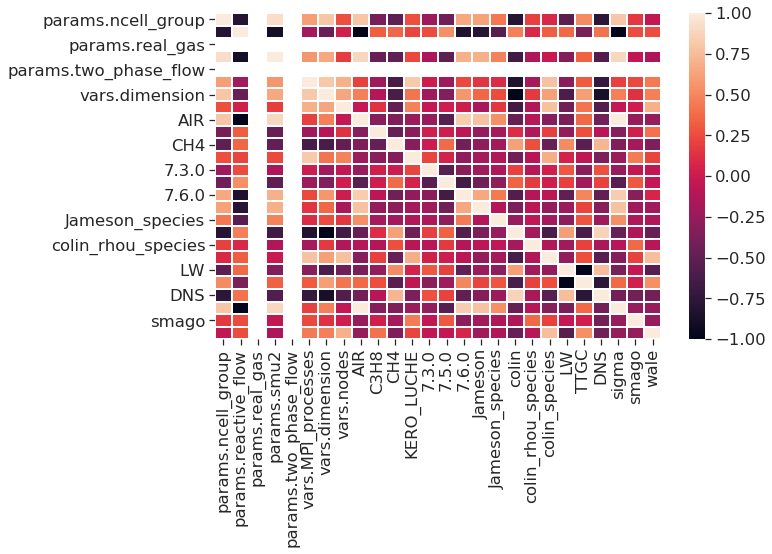

In [84]:
plt.figure(figsize = (10,6))
sns.heatmap(df_pca.corr(), linecolor = 'white', linewidth = 1)

In [85]:
#df_pca.corr()['converged'].sort_values()[:-3].plot(kind = 'bar')
#['converged'][:-4].sort_values()
#.plot(kind = 'bar')

## Kmeans with 3 clusters with highlight of converged/not converged

In [86]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scores_pca)
df_comp['k_means_pca'] = kmeans.labels_
print(kmeans.labels_)

[2 2 2 2 2 0 1 0 2 2 0 0 1 0 0 0 1 0 1 0 0 0 1 2 0 2 0 0 1 2]


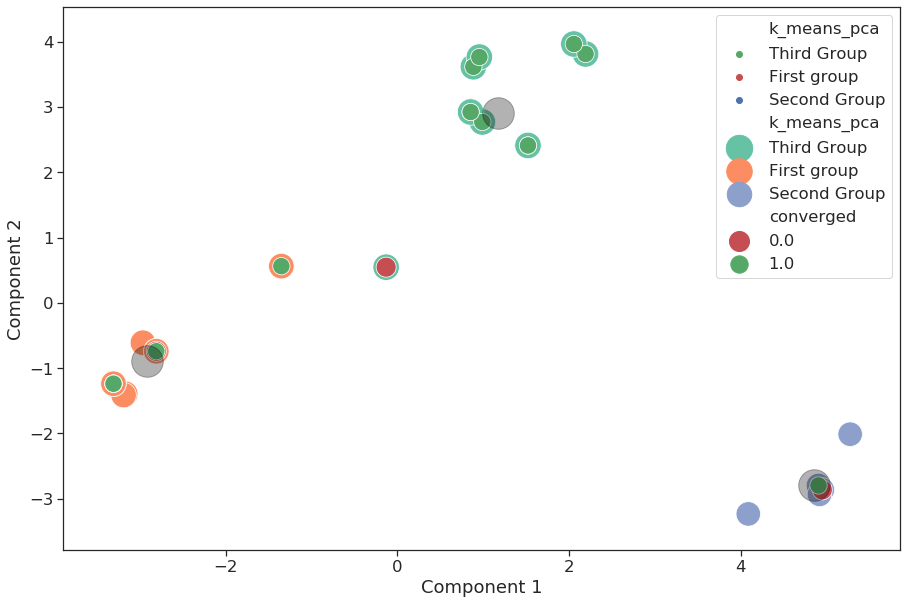

In [87]:
# With 2 components in PCA and kmeans = 4
# Now ce can visualize our data on two components from the PCA, colored by Kmeans
df_comp['k_means_pca'] = df_comp['k_means_pca'].map({0: 'First group', 
                                                     1: 'Second Group',
                                                    2: 'Third Group'})
fig = plt.figure(figsize = (15,10))
x = df_comp['Component 1']
y = df_comp['Component 2']

cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot( x, y, hue = df_comp['k_means_pca'], 
                palette = ['g', 'r', 'b'], alpha = 0.6)

sns.scatterplot(x, y, hue = df_comp['k_means_pca'], size = df_comp['k_means_pca'],
                sizes= (600,700), palette="Set2")

sns.scatterplot(x, y, hue = df_pca_c['converged'], size = df_pca_c['converged'],
               sizes = (300,400), palette = ['r', 'g'])

plt.scatter(kmeans.cluster_centers_[0, 0], 
            kmeans.cluster_centers_[0, 1],  
            s= 1000, c='black', label = 'Centroids', alpha = 0.3)

plt.scatter(kmeans.cluster_centers_[1, 0], 
            kmeans.cluster_centers_[1, 1], 
            s= 1000, c='black', label = 'Centroids', alpha = 0.3)

plt.scatter(kmeans.cluster_centers_[2, 0], 
            kmeans.cluster_centers_[2, 1], 
            s= 1000, c='black', label = 'Centroids', alpha = 0.3)


## PCA with 4 components

We know that a PCA with 4 components should optimize the standard deviation kept in the dimension reduction.

In [88]:
## PCA with 4 components
scaler = StandardScaler()
scaler.fit(df_pca)
scaled_data = scaler.transform(df_pca)
scaled_data
pca = PCA(n_components = 4)
pca.fit(scaled_data)
scores_pca = pca.transform(scaled_data)
#scores_pca
df_comp = pd.concat([df_pca.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_comp.columns.values[-4:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']

scores_pca stores the projections of each run in the new frame system.
PCA_components stores the linear coefficients of each PCA component of the original features.

In [89]:
pca4 = pd.DataFrame(abs(pca.components_), columns = df_pca.columns)
pca4['PCA components'] = [0, 1, 2, 3]
pca4.set_index('PCA components')
pca4['KERO_LUCHE']

0    0.065522
1    0.278018
2    0.439629
3    0.031531
Name: KERO_LUCHE, dtype: float64

In [90]:
scores_pca

array([[ 2.19153535,  3.81028607,  1.13654485, -1.82284324],
       [ 1.52127693,  2.40962554, -2.64191146, -1.09173465],
       [ 0.88499733,  3.61445156, -2.34915283, -0.27050389],
       [ 0.85314812,  2.92182877,  3.31352776,  0.97202963],
       [ 0.95494044,  3.76345349, -2.35629886, -0.32519934],
       [-3.30513061, -1.2377317 ,  0.24903602,  0.33956647],
       [ 5.27224252, -2.01044043, -0.4315747 , -0.16648134],
       [-3.30513061, -1.2377317 ,  0.24903602,  0.33956647],
       [ 2.05505047,  3.96296024,  0.637036  , -0.01594566],
       [-0.13043825,  0.54631799, -0.33197273,  5.73384991],
       [-2.9622764 , -0.61009695, -0.92624099, -0.33112812],
       [-1.3504639 ,  0.56216359, -1.78667485,  1.7222236 ],
       [ 4.08606735, -3.23129183,  1.32399613, -0.58321079],
       [-3.30513061, -1.2377317 ,  0.24903602,  0.33956647],
       [-2.80648502, -0.74072007, -0.40255149, -2.14716176],
       [-3.16862165, -1.39035456,  0.74854241, -1.46734995],
       [ 4.94800778, -2.

for the first component of PCA, we can see that the most important features are params.ncell_group, params.smu2, vars.MPI_processes, vars.dimension, vars.nodes and AIR.

In [91]:
def biplot4(scores_pca, coeff):
    
    x = scores_pca[:,0] # projection on PC1
    print(x)
    y = scores_pca[:,1] # projection on PC2
    print(y)
    
    
    n = coeff.shape[0] # number of variables
    print(n)
    plt.figure(figsize=(10,8), dpi=100)

    colors = ['g','r','y']
    markers=['o','^','x']

    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0.0, 0.0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.9,
                  linestyle = '-',linewidth = 1.1, overhang=0.2)
        plt.text(coeff[i,0]*1.01, coeff[i,1]*1.01, df_pca.columns[i], 
                 color = 'k', ha = 'center', va = 'center',fontsize=10)
        
    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
#    limx= int(x.max())
#    limy= int(y.max())
    plt.xlim([-0.5,0.5])
    plt.ylim([-0.5,0.5])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

[ 2.19153535  1.52127693  0.88499733  0.85314812  0.95494044 -3.30513061
  5.27224252 -3.30513061  2.05505047 -0.13043825 -2.9622764  -1.3504639
  4.08606735 -3.30513061 -2.80648502 -3.16862165  4.94800778 -3.30513061
  4.90356866 -3.30513061 -3.18759107 -1.3504639   4.94800778  0.98963299
 -2.80648502  0.85314812 -3.30513061 -3.30510652  4.91581461  1.52127693]
[ 3.81028607  2.40962554  3.61445156  2.92182877  3.76345349 -1.2377317
 -2.01044043 -1.2377317   3.96296024  0.54631799 -0.61009695  0.56216359
 -3.23129183 -1.2377317  -0.74072007 -1.39035456 -2.86335269 -1.2377317
 -2.79583758 -1.2377317  -1.41168751  0.56216359 -2.86335269  2.7691546
 -0.74072007  2.92182877 -1.2377317  -1.23768039 -2.9319348   2.40962554]
26


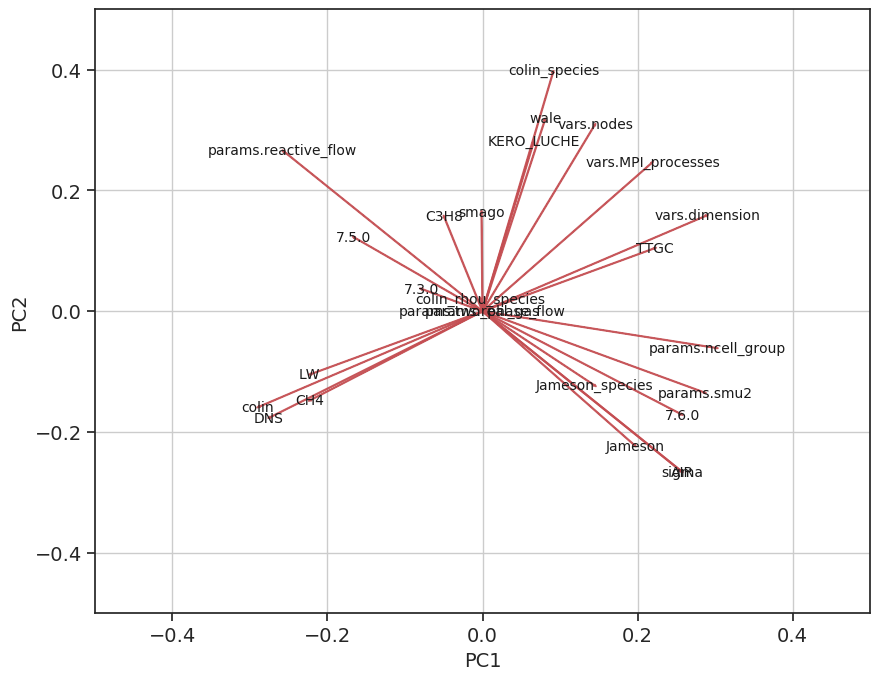

In [92]:
biplot4(scores_pca, np.transpose(pca.components_))
plt.show()

In [93]:
def biplot4(scores_pca, coeff):
    
    x = scores_pca[:,2] # projection on PC1
    print(x)
    y = scores_pca[:,3] # projection on PC2
    print(y)
    
    
    n = coeff.shape[0] # number of variables
    print(n)
    plt.figure(figsize=(10,8), dpi=100)

    colors = ['g','r','y']
    markers=['o','^','x']

    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0.0, 0.0, coeff[i,2], coeff[i,3], color = 'r', alpha = 0.9,
                  linestyle = '-',linewidth = 1.1, overhang=0.2)
        plt.text(coeff[i,2]*1.01, coeff[i,3]*1.01, df_pca.columns[i], 
                 color = 'k', ha = 'center', va = 'center',fontsize=10)
        
    plt.xlabel("PC{}".format(3), size=14)
    plt.ylabel("PC{}".format(4), size=14)
#    limx= int(x.max())
#    limy= int(y.max())
    plt.xlim([-0.5,0.5])
    plt.ylim([-0.5,0.5])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

[ 1.13654485 -2.64191146 -2.34915283  3.31352776 -2.35629886  0.24903602
 -0.4315747   0.24903602  0.637036   -0.33197273 -0.92624099 -1.78667485
  1.32399613  0.24903602 -0.40255149  0.74854241 -0.10188479  0.24903602
 -0.39390757  0.24903602  0.72432732 -1.78667485 -0.10188479  3.81303661
 -0.40255149  3.31352776  0.24903602  0.24903356 -0.09859564 -2.64191146]
[-1.82284324 -1.09173465 -0.27050389  0.97202963 -0.32519934  0.33956647
 -0.16648134  0.33956647 -0.01594566  5.73384991 -0.33112812  1.7222236
 -0.58321079  0.33956647 -2.14716176 -1.46734995  0.0358338   0.33956647
  0.12182133  0.33956647 -1.4584775   1.7222236   0.0358338  -0.83486795
 -2.14716176  0.97202963  0.33956647  0.33954764  0.06100883 -1.09173465]
26


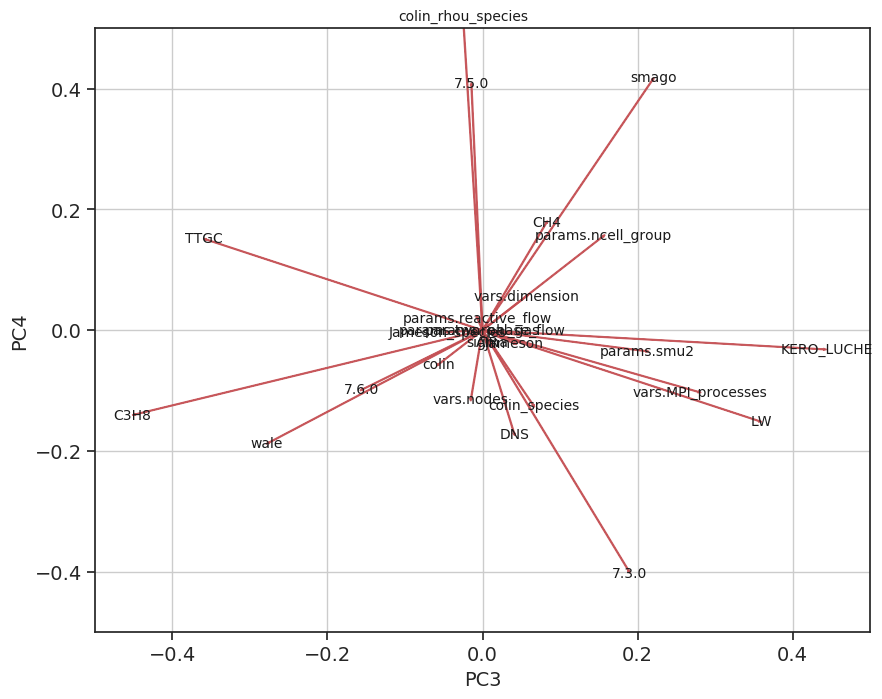

In [94]:
biplot4(scores_pca, np.transpose(pca.components_))
plt.show()

In [95]:
df_comp.head()

params.ncell_group  params.reactive_flow  params.real_gas  params.smu2  \
0                 100                     1              0.0          1.0   
1                  60                     1              0.0          0.0   
2                  60                     1              0.0          0.0   
3                 100                     1              0.0          1.0   
4                  60                     1              0.0          0.0   

   params.two_phase_flow  vars.MPI_processes  vars.dimension  vars.nodes  AIR  \
0                    0.0                1120               3     8043365    0   
1                    0.0                 540               3     3452844    0   
2                    0.0                 540               3    10205059    0   
3                    0.0                1120               3     5203109    0   
4                    0.0                 540               3    11947559    0   

   C3H8  ...  LW  TTGC  DNS  sigma  smago  wale  Component 1  Component 2  \
0     0  ...   0     1    0      0      0     1     2.191535     3.810286   
1     1  ...   0     1    0      0      0     1     1.521277     2.409626   
2     1  ...   0     1    0      0      0     1     0.884997     3.614452   
3     0  ...   1     0    0      0      1     0     0.853148     2.921829   
4     1  ...   0     1    0      0      0     1     0.954940     3.763453   

   Component 3  Component 4  
0     1.136545    -1.822843  
1    -2.641911    -1.091735  
2    -2.349153    -0.270504  
3     3.313528     0.972030  
4    -2.356299    -0.325199  

[5 rows x 30 columns]

In [96]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scores_pca)
df_comp['k_means_pca'] = kmeans.labels_
print(kmeans.labels_)

[2 2 2 2 2 0 1 0 2 0 0 0 1 0 0 0 1 0 1 0 0 0 1 2 0 2 0 0 1 2]


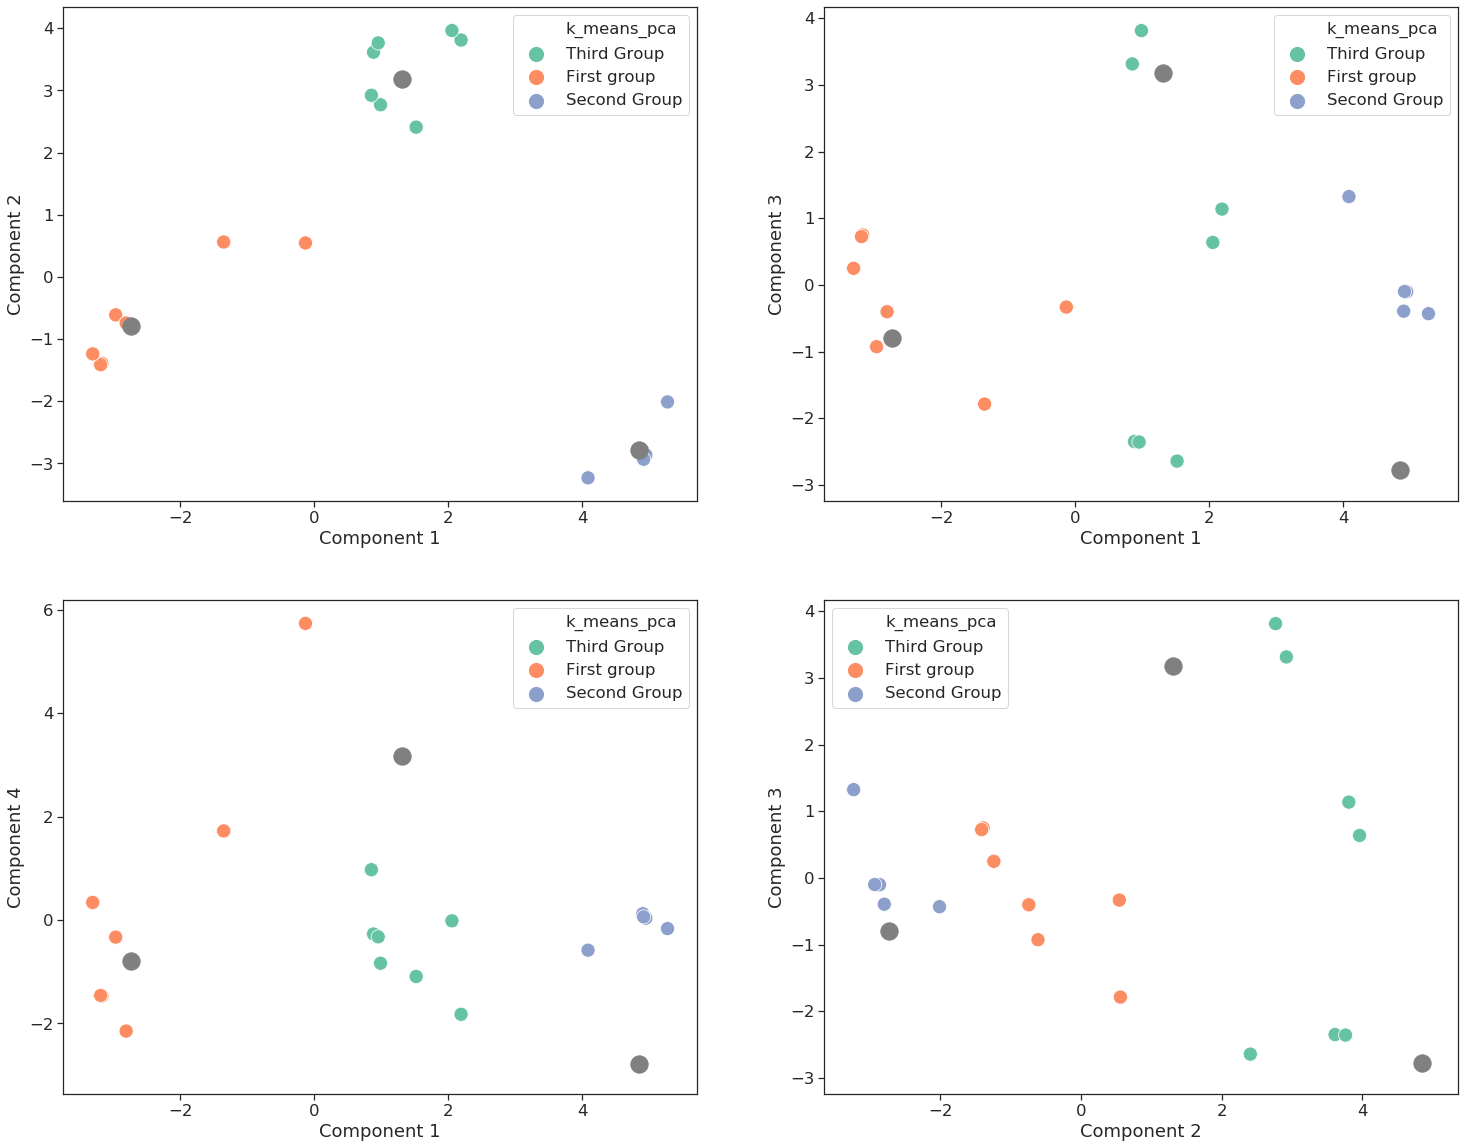

In [97]:
# Now ce can visualize our data on two components from the PCA, colored by Kmeans
df_comp['k_means_pca'] = df_comp['k_means_pca'].map({0: 'First group', 
                                                     1: 'Second Group',
                                                    2: 'Third Group'})
fig = plt.figure(figsize = (25,20))
ax1 = fig.add_subplot(2,2,1)
x = df_comp['Component 1']
y = df_comp['Component 2']

cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
#sns.scatterplot( x, y, hue = df_comp['k_means_pca'], 
#                palette = ['g', 'r', 'b'])

sns.scatterplot(x, y, hue = df_comp['k_means_pca'],
                size = df_comp['k_means_pca'],
                sizes= (200,200), palette="Set2")
plt.scatter(kmeans.cluster_centers_[0, 0], 
            kmeans.cluster_centers_[0, 1],  
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[1, 0], 
            kmeans.cluster_centers_[1, 1], 
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[2, 0], 
            kmeans.cluster_centers_[2, 1], 
            s= 300, c='grey', label = 'Centroids')

ax2 = fig.add_subplot(2,2,2)
x = df_comp['Component 1']
y = df_comp['Component 3']

sns.scatterplot(x, y, hue = df_comp['k_means_pca'],
                size = df_comp['k_means_pca'], sizes= (200,200),
                 palette="Set2")
plt.scatter(kmeans.cluster_centers_[0, 0], 
            kmeans.cluster_centers_[0, 1],  
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[1, 0], 
            kmeans.cluster_centers_[1, 1], 
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[2, 0], 
            kmeans.cluster_centers_[2, 1], 
            s= 300, c='grey', label = 'Centroids')

ax3 = fig.add_subplot(2,2,3)
x = df_comp['Component 1']
y = df_comp['Component 4']

sns.scatterplot(x, y, hue = df_comp['k_means_pca'], 
                size = df_comp['k_means_pca'], sizes= (200,200),
                 palette="Set2")
plt.scatter(kmeans.cluster_centers_[0, 0], 
            kmeans.cluster_centers_[0, 1],  
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[1, 0], 
            kmeans.cluster_centers_[1, 1], 
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[2, 0], 
            kmeans.cluster_centers_[2, 1], 
            s= 300, c='grey', label = 'Centroids')

ax4 = fig.add_subplot(2,2,4)
x = df_comp['Component 2']
y = df_comp['Component 3']

sns.scatterplot(x, y, hue = df_comp['k_means_pca'], size = df_comp['k_means_pca'],
                sizes= (200,200), palette="Set2")
plt.scatter(kmeans.cluster_centers_[0, 0], 
            kmeans.cluster_centers_[0, 1],  
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[1, 0], 
            kmeans.cluster_centers_[1, 1], 
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[2, 0], 
            kmeans.cluster_centers_[2, 1], 
            s= 300, c='grey', label = 'Centroids')

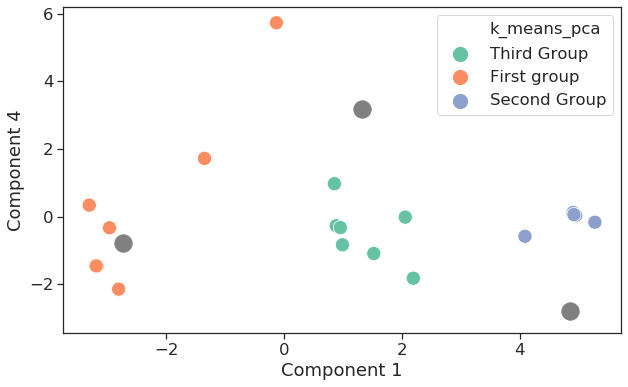

In [98]:
fig = plt.figure(figsize = (10,6))
x = df_comp['Component 1']
y = df_comp['Component 4']

sns.scatterplot(x, y, hue = df_comp['k_means_pca'], size = df_comp['k_means_pca'],
                sizes= (200,200), palette="Set2")
plt.scatter(kmeans.cluster_centers_[0, 0], 
            kmeans.cluster_centers_[0, 1],  
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[1, 0], 
            kmeans.cluster_centers_[1, 1], 
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[2, 0], 
            kmeans.cluster_centers_[2, 1], 
            s= 300, c='grey', label = 'Centroids')

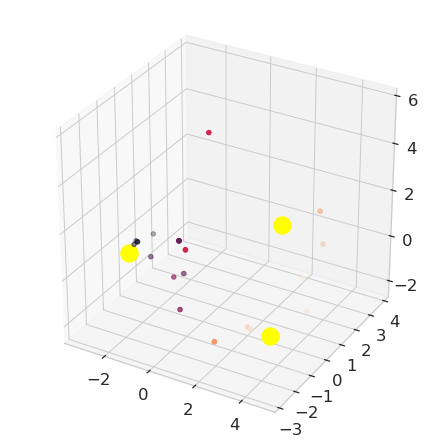

In [99]:
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
#ax = fig.add_subplot(111, projection='3d') # Method 2

x = df_comp['Component 2']
y = df_comp['Component 3']
z = df_comp['Component 4']

#sns.scatterplot(x, y, hue = df_comp['k_means_pca'], size = df_comp['k_means_pca'],
#                sizes= (100,200), palette="Set2")
ax.scatter(x, y, z, c = x, marker='o')

ax.scatter(kmeans.cluster_centers_[0, 0], 
            kmeans.cluster_centers_[0, 1],  
            s= 300, c='yellow', label = 'Centroids')

ax.scatter(kmeans.cluster_centers_[1, 0], 
            kmeans.cluster_centers_[1, 1], 
            s= 300, c='yellow', label = 'Centroids')

ax.scatter(kmeans.cluster_centers_[2, 0], 
            kmeans.cluster_centers_[2, 1], 
            s= 300, c='yellow', label = 'Centroids')

#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')

plt.show()

In [100]:
df_comp3 = df_comp.drop(['params.reactive_flow','params.real_gas', 
                                            'params.two_phase_flow', 'Component 1', 
                                            'Component 2', 'Component 3', 'Component 4'], axis = 1)
df_comp3.groupby('k_means_pca').mean()

params.ncell_group  params.smu2  vars.MPI_processes  \
k_means_pca                                                         
First group            48.000000     0.000000           29.466667   
Second Group          140.000000     2.000000          540.000000   
Third Group            82.222222     0.555556          862.222222   

              vars.dimension    vars.nodes  AIR      C3H8       CH4  \
k_means_pca                                                           
First group         2.066667  1.070633e+04  0.0  0.333333  0.666667   
Second Group        3.000000  2.248243e+06  1.0  0.000000  0.000000   
Third Group         3.000000  6.750485e+06  0.0  0.444444  0.000000   

              KERO_LUCHE     7.3.0  ...  Jameson_species     colin  \
k_means_pca                         ...                              
First group     0.000000  0.266667  ...         0.000000  0.933333   
Second Group    0.000000  0.000000  ...         0.333333  0.000000   
Third Group     0.555556  0.222222  ...         0.000000  0.000000   

              colin_rhou_species  colin_species        LW      TTGC  DNS  \
k_means_pca                                                                
First group             0.066667            0.0  0.800000  0.200000  0.8   
Second Group            0.000000            0.0  0.166667  0.833333  0.0   
Third Group             0.000000            1.0  0.333333  0.666667  0.0   

              sigma     smago      wale  
k_means_pca                              
First group     0.0  0.200000  0.000000  
Second Group    1.0  0.000000  0.000000  
Third Group     0.0  0.333333  0.666667  

[3 rows x 23 columns]

In [101]:
df_comp3.groupby('k_means_pca').std()

params.ncell_group  params.smu2  vars.MPI_processes  \
k_means_pca                                                         
First group            21.111947     0.000000            13.61127   
Second Group            0.000000     0.000000             0.00000   
Third Group            21.081851     0.527046           305.68684   

              vars.dimension    vars.nodes  AIR      C3H8      CH4  \
k_means_pca                                                          
First group         0.258199  1.996749e+04  0.0  0.487950  0.48795   
Second Group        0.000000  3.460954e+06  0.0  0.000000  0.00000   
Third Group         0.000000  2.983679e+06  0.0  0.527046  0.00000   

              KERO_LUCHE     7.3.0  ...  Jameson_species     colin  \
k_means_pca                         ...                              
First group     0.000000  0.457738  ...         0.000000  0.258199   
Second Group    0.000000  0.000000  ...         0.516398  0.000000   
Third Group     0.527046  0.440959  ...         0.000000  0.000000   

              colin_rhou_species  colin_species        LW      TTGC       DNS  \
k_means_pca                                                                     
First group             0.258199            0.0  0.414039  0.414039  0.414039   
Second Group            0.000000            0.0  0.408248  0.408248  0.000000   
Third Group             0.000000            0.0  0.500000  0.500000  0.000000   

              sigma     smago  wale  
k_means_pca                          
First group     0.0  0.414039   0.0  
Second Group    0.0  0.000000   0.0  
Third Group     0.0  0.500000   0.5  

[3 rows x 23 columns]

In [102]:
dataframe = pd.concat([df_comp3[df_comp3['k_means_pca'] == 'First group'].mean(), 
                       df_comp3[df_comp3['k_means_pca'] == 'First group'].std(),
                       df_comp3[df_comp3['k_means_pca'] == 'Second Group'].mean(), 
                       df_comp3[df_comp3['k_means_pca'] == 'Second Group'].std(),
                       df_comp3[df_comp3['k_means_pca'] == 'Third Group'].mean(), 
                       df_comp3[df_comp3['k_means_pca'] == 'Third Group'].std()], axis = 1) 
dataframe.columns =  ['Mean First group', 'Std First Group', 
                      'Mean Second group', 'Std Second Group',
                      'Mean Third group', 'Std Third Group']
dataframe.sort_values(by ='Mean Second group', ascending = False)

Mean First group  Std First Group  Mean Second group  \
vars.nodes              10706.333333     19967.486989       2.248243e+06   
vars.MPI_processes         29.466667        13.611270       5.400000e+02   
params.ncell_group         48.000000        21.111947       1.400000e+02   
vars.dimension              2.066667         0.258199       3.000000e+00   
params.smu2                 0.000000         0.000000       2.000000e+00   
sigma                       0.000000         0.000000       1.000000e+00   
7.6.0                       0.000000         0.000000       1.000000e+00   
AIR                         0.000000         0.000000       1.000000e+00   
TTGC                        0.200000         0.414039       8.333333e-01   
Jameson                     0.000000         0.000000       6.666667e-01   
Jameson_species             0.000000         0.000000       3.333333e-01   
LW                          0.800000         0.414039       1.666667e-01   
CH4                         0.666667         0.487950       0.000000e+00   
KERO_LUCHE                  0.000000         0.000000       0.000000e+00   
7.3.0                       0.266667         0.457738       0.000000e+00   
7.5.0                       0.733333         0.457738       0.000000e+00   
C3H8                        0.333333         0.487950       0.000000e+00   
colin                       0.933333         0.258199       0.000000e+00   
colin_rhou_species          0.066667         0.258199       0.000000e+00   
colin_species               0.000000         0.000000       0.000000e+00   
DNS                         0.800000         0.414039       0.000000e+00   
smago                       0.200000         0.414039       0.000000e+00   
wale                        0.000000         0.000000       0.000000e+00   

                    Std Second Group  Mean Third group  Std Third Group  
vars.nodes              3.460954e+06      6.750485e+06     2.983679e+06  
vars.MPI_processes      0.000000e+00      8.622222e+02     3.056868e+02  
params.ncell_group      0.000000e+00      8.222222e+01     2.108185e+01  
vars.dimension          0.000000e+00      3.000000e+00     0.000000e+00  
params.smu2             0.000000e+00      5.555556e-01     5.270463e-01  
sigma                   0.000000e+00      0.000000e+00     0.000000e+00  
7.6.0                   0.000000e+00      2.222222e-01     4.409586e-01  
AIR                     0.000000e+00      0.000000e+00     0.000000e+00  
TTGC                    4.082483e-01      6.666667e-01     5.000000e-01  
Jameson                 5.163978e-01      0.000000e+00     0.000000e+00  
Jameson_species         5.163978e-01      0.000000e+00     0.000000e+00  
LW                      4.082483e-01      3.333333e-01     5.000000e-01  
CH4                     0.000000e+00      0.000000e+00     0.000000e+00  
KERO_LUCHE              0.000000e+00      5.555556e-01     5.270463e-01  
7.3.0                   0.000000e+00      2.222222e-01     4.409586e-01  
7.5.0                   0.000000e+00      5.555556e-01     5.270463e-01  
C3H8                    0.000000e+00      4.444444e-01     5.270463e-01  
colin                   0.000000e+00      0.000000e+00     0.000000e+00  
colin_rhou_species      0.000000e+00      0.000000e+00     0.000000e+00  
colin_species           0.000000e+00      1.000000e+00     0.000000e+00  
DNS                     0.000000e+00      0.000000e+00     0.000000e+00  
smago                   0.000000e+00      3.333333e-01     5.000000e-01  
wale                    0.000000e+00      6.666667e-01     5.000000e-01


# Kmeans = 4

In [103]:
## PCA with 4 components
scaler = StandardScaler()
scaler.fit(df_pca)
scaled_data = scaler.transform(df_pca)
scaled_data
pca = PCA(n_components = 4)
pca.fit(scaled_data)
scores_pca = pca.transform(scaled_data)
#scores_pca
df_comp = pd.concat([df_pca.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_comp.columns.values[-4:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
kmeans = KMeans(n_clusters = 4)
kmeans.fit(scores_pca)
df_comp['k_means_pca'] = kmeans.labels_
print(kmeans.labels_)

[2 0 0 2 0 3 1 3 2 0 3 0 1 3 3 3 1 3 1 3 3 0 1 2 3 2 3 3 1 0]


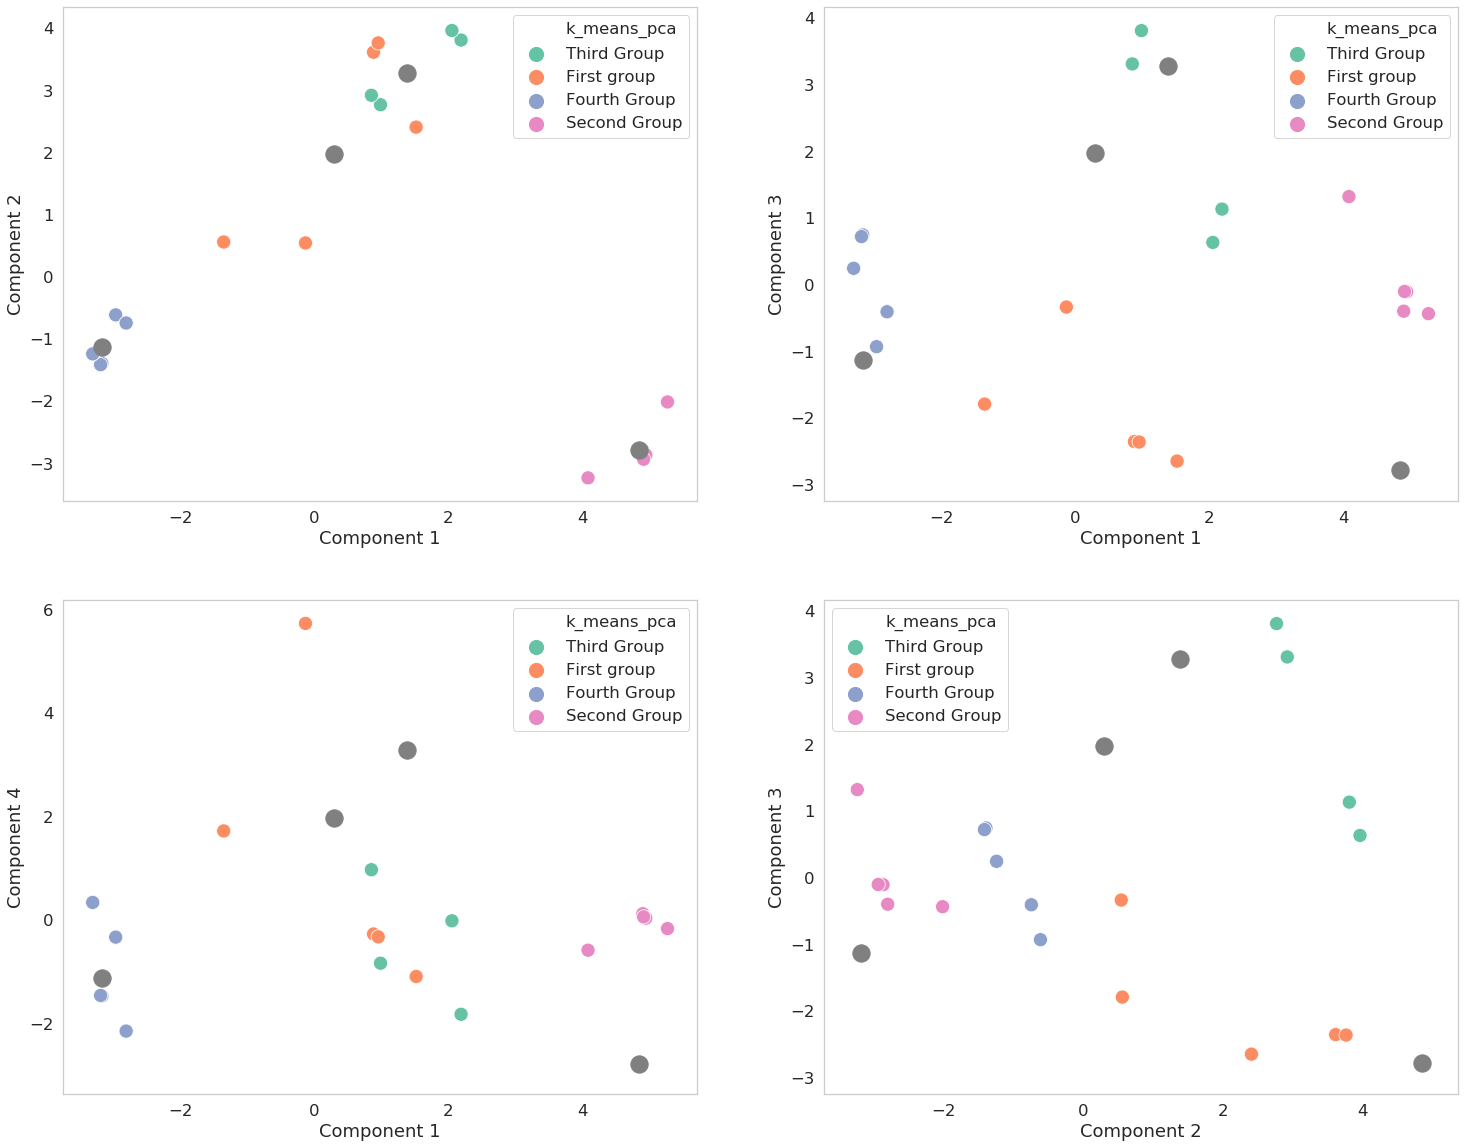

In [104]:
# Now ce can visualize our data on two components from the PCA, colored by Kmeans
df_comp['k_means_pca'] = df_comp['k_means_pca'].map({0: 'First group', 
                                                     1: 'Second Group',
                                                    2: 'Third Group', 
                                                     3: 'Fourth Group'})

fig = plt.figure(figsize = (25,20))
ax1 = fig.add_subplot(2,2,1)
x = df_comp['Component 1']
y = df_comp['Component 2']

cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
#sns.scatterplot( x, y, hue = df_comp['k_means_pca'], 
#                palette = ['g', 'r', 'b'])

sns.scatterplot(x, y, hue = df_comp['k_means_pca'],
                size = df_comp['k_means_pca'],
                sizes= (200,200), palette="Set2")
plt.scatter(kmeans.cluster_centers_[0, 0], 
            kmeans.cluster_centers_[0, 1],  
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[1, 0], 
            kmeans.cluster_centers_[1, 1], 
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[2, 0], 
            kmeans.cluster_centers_[2, 1], 
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[3, 0], 
            kmeans.cluster_centers_[3, 1], 
            s= 300, c='grey', label = 'Centroids')

ax2 = fig.add_subplot(2,2,2)
x = df_comp['Component 1']
y = df_comp['Component 3']

sns.scatterplot(x, y, hue = df_comp['k_means_pca'],
                size = df_comp['k_means_pca'], sizes= (200,200),
                 palette="Set2")
plt.scatter(kmeans.cluster_centers_[0, 0], 
            kmeans.cluster_centers_[0, 1],  
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[1, 0], 
            kmeans.cluster_centers_[1, 1], 
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[2, 0], 
            kmeans.cluster_centers_[2, 1], 
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[3, 0], 
            kmeans.cluster_centers_[3, 1], 
            s= 300, c='grey', label = 'Centroids')

ax3 = fig.add_subplot(2,2,3)
x = df_comp['Component 1']
y = df_comp['Component 4']

sns.scatterplot(x, y, hue = df_comp['k_means_pca'], 
                size = df_comp['k_means_pca'], sizes= (200,200),
                 palette="Set2")
plt.scatter(kmeans.cluster_centers_[0, 0], 
            kmeans.cluster_centers_[0, 1],  
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[1, 0], 
            kmeans.cluster_centers_[1, 1], 
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[2, 0], 
            kmeans.cluster_centers_[2, 1], 
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[3, 0], 
            kmeans.cluster_centers_[3, 1], 
            s= 300, c='grey', label = 'Centroids')

ax4 = fig.add_subplot(2,2,4)
x = df_comp['Component 2']
y = df_comp['Component 3']

sns.scatterplot(x, y, hue = df_comp['k_means_pca'], size = df_comp['k_means_pca'],
                sizes= (200,200), palette="Set2")
plt.scatter(kmeans.cluster_centers_[0, 0], 
            kmeans.cluster_centers_[0, 1],  
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[1, 0], 
            kmeans.cluster_centers_[1, 1], 
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[2, 0], 
            kmeans.cluster_centers_[2, 1], 
            s= 300, c='grey', label = 'Centroids')

plt.scatter(kmeans.cluster_centers_[3, 0], 
            kmeans.cluster_centers_[3, 1], 
            s= 300, c='grey', label = 'Centroids')

In [105]:
df_comp = df_comp.drop(['params.reactive_flow','params.real_gas', 
                                            'params.two_phase_flow', 'Component 1', 
                                            'Component 2', 'Component 3', 'Component 4'], axis = 1)
df_comp.groupby('k_means_pca').mean()

params.ncell_group  params.smu2  vars.MPI_processes  \
k_means_pca                                                         
First group            68.571429          0.0          320.000000   
Fourth Group           40.000000          0.0           30.166667   
Second Group          140.000000          2.0          540.000000   
Third Group           100.000000          1.0         1120.000000   

              vars.dimension    vars.nodes  AIR      C3H8       CH4  \
k_means_pca                                                           
First group         2.714286  4.170526e+06  0.0  0.857143  0.142857   
Fourth Group        2.000000  2.101667e+03  0.0  0.250000  0.750000   
Second Group        3.000000  2.248243e+06  1.0  0.000000  0.000000   
Third Group         3.000000  6.339211e+06  0.0  0.000000  0.000000   

              KERO_LUCHE     7.3.0  ...  Jameson_species     colin  \
k_means_pca                         ...                              
First group          0.0  0.000000  ...         0.000000  0.285714   
Fourth Group         0.0  0.333333  ...         0.000000  1.000000   
Second Group         0.0  0.000000  ...         0.333333  0.000000   
Third Group          1.0  0.400000  ...         0.000000  0.000000   

              colin_rhou_species  colin_species        LW      TTGC  DNS  \
k_means_pca                                                                
First group             0.142857       0.571429  0.000000  1.000000  0.0   
Fourth Group            0.000000       0.000000  1.000000  0.000000  1.0   
Second Group            0.000000       0.000000  0.166667  0.833333  0.0   
Third Group             0.000000       1.000000  0.600000  0.400000  0.0   

              sigma     smago      wale  
k_means_pca                              
First group     0.0  0.428571  0.571429  
Fourth Group    0.0  0.000000  0.000000  
Second Group    1.0  0.000000  0.000000  
Third Group     0.0  0.600000  0.400000  

[4 rows x 23 columns]

In [106]:
dataframe = pd.concat([df_comp[df_comp['k_means_pca'] == 'First group'].mean(), 
                       df_comp[df_comp['k_means_pca'] == 'First group'].std(),
                       df_comp[df_comp['k_means_pca'] == 'Second Group'].mean(), 
                       df_comp[df_comp['k_means_pca'] == 'Second Group'].std(),
                       df_comp[df_comp['k_means_pca'] == 'Third Group'].mean(), 
                       df_comp[df_comp['k_means_pca'] == 'Third Group'].std(),
                       df_comp[df_comp['k_means_pca'] == 'Fourth Group'].mean(), 
                       df_comp[df_comp['k_means_pca'] == 'Fourth Group'].std()], axis = 1) 
dataframe.columns =  ['Mean First group', 'Std First Group', 
                      'Mean Second group', 'Std Second Group',
                      'Mean Third group', 'Std Third Group',
                     'Mean Fourth group', 'Mean Fourth Group']
dataframe.sort_values(by ='Mean Third group', ascending = False)

Mean First group  Std First Group  Mean Second group  \
vars.nodes              4.170526e+06     4.983067e+06       2.248243e+06   
vars.MPI_processes      3.200000e+02     2.745469e+02       5.400000e+02   
params.ncell_group      6.857143e+01     2.267787e+01       1.400000e+02   
vars.dimension          2.714286e+00     4.879500e-01       3.000000e+00   
params.smu2             0.000000e+00     0.000000e+00       2.000000e+00   
KERO_LUCHE              0.000000e+00     0.000000e+00       0.000000e+00   
colin_species           5.714286e-01     5.345225e-01       0.000000e+00   
smago                   4.285714e-01     5.345225e-01       0.000000e+00   
LW                      0.000000e+00     0.000000e+00       1.666667e-01   
7.5.0                   7.142857e-01     4.879500e-01       0.000000e+00   
TTGC                    1.000000e+00     0.000000e+00       8.333333e-01   
wale                    5.714286e-01     5.345225e-01       0.000000e+00   
7.3.0                   0.000000e+00     0.000000e+00       0.000000e+00   
Jameson                 0.000000e+00     0.000000e+00       6.666667e-01   
Jameson_species         0.000000e+00     0.000000e+00       3.333333e-01   
colin                   2.857143e-01     4.879500e-01       0.000000e+00   
colin_rhou_species      1.428571e-01     3.779645e-01       0.000000e+00   
CH4                     1.428571e-01     3.779645e-01       0.000000e+00   
C3H8                    8.571429e-01     3.779645e-01       0.000000e+00   
DNS                     0.000000e+00     0.000000e+00       0.000000e+00   
sigma                   0.000000e+00     0.000000e+00       1.000000e+00   
AIR                     0.000000e+00     0.000000e+00       1.000000e+00   
7.6.0                   2.857143e-01     4.879500e-01       1.000000e+00   

                    Std Second Group  Mean Third group  Std Third Group  \
vars.nodes              3.460954e+06         6339211.4     1.555672e+06   
vars.MPI_processes      0.000000e+00            1120.0     0.000000e+00   
params.ncell_group      0.000000e+00             100.0     0.000000e+00   
vars.dimension          0.000000e+00               3.0     0.000000e+00   
params.smu2             0.000000e+00               1.0     0.000000e+00   
KERO_LUCHE              0.000000e+00               1.0     0.000000e+00   
colin_species           0.000000e+00               1.0     0.000000e+00   
smago                   0.000000e+00               0.6     5.477226e-01   
LW                      4.082483e-01               0.6     5.477226e-01   
7.5.0                   0.000000e+00               0.6     5.477226e-01   
TTGC                    4.082483e-01               0.4     5.477226e-01   
wale                    0.000000e+00               0.4     5.477226e-01   
7.3.0                   0.000000e+00               0.4     5.477226e-01   
Jameson                 5.163978e-01               0.0     0.000000e+00   
Jameson_species         5.163978e-01               0.0     0.000000e+00   
colin                   0.000000e+00               0.0     0.000000e+00   
colin_rhou_species      0.000000e+00               0.0     0.000000e+00   
CH4                     0.000000e+00               0.0     0.000000e+00   
C3H8                    0.000000e+00               0.0     0.000000e+00   
DNS                     0.000000e+00               0.0     0.000000e+00   
sigma                   0.000000e+00               0.0     0.000000e+00   
AIR                     0.000000e+00               0.0     0.000000e+00   
7.6.0                   0.000000e+00               0.0     0.000000e+00   

                    Mean Fourth group  Mean Fourth Group  
vars.nodes                2101.666667        3714.061813  
vars.MPI_processes          30.166667          13.623732  
params.ncell_group          40.000000           0.000000  
vars.dimension               2.000000           0.000000  
params.smu2                  0.000000           0.000000  
KERO_LUCHE                   0.000000   

# Decision Tree 

In [107]:
df_pca_c

params.ncell_group  params.reactive_flow  params.real_gas  \
index_run                                                              
0                         100                     1              0.0   
1                          60                     1              0.0   
2                          60                     1              0.0   
3                         100                     1              0.0   
4                          60                     1              0.0   
5                          40                     1              0.0   
7                         140                     0              0.0   
8                          40                     1              0.0   
9                         100                     1              0.0   
11                        120                     1              0.0   
14                         40                     1              0.0   
16                         60                     1              0.0   
17                        140                     0              0.0   
18                         40                     1              0.0   
19                         40                     1              0.0   
23                         40                     1              0.0   
24                        140                     0              0.0   
25                         40                     1              0.0   
26                        140                     0              0.0   
29                         40                     1              0.0   
32                         40                     1              0.0   
34                         60                     1              0.0   
36                        140                     0              0.0   
37                        100                     1              0.0   
38                         40                     1              0.0   
39                        100                     1              0.0   
40                         40                     1              0.0   
41                         40                     1              0.0   
42                        140                     0              0.0   
43                         60                     1              0.0   

           params.smu2  params.two_phase_flow  vars.MPI_processes  \
index_run                                                           
0                  1.0                    0.0                1120   
1                  0.0                    0.0                 540   
2                  0.0                    0.0                 540   
3                  1.0                    0.0                1120   
4                  0.0                    0.0                 540   
5                  0.0                    0.0                  36   
7                  2.0                    0.0                 540   
8                  0.0                    0.0                  36   
9                  1.0                    0.0                1120   
11                 0.0                    0.0                   8   
14                 0.0                    0.0                   1   
16                 0.0                    0.0                  36   
17                 2.0                    0.0                 540   
18                 0.0                    0.0                  36   
19                 0.0                    0.0                  36   
23                 0.0                    0.0                  36   
24                 2.0                    0.0                 540   
25                 0.0                    0.0                  36   
26                 2.0                    0.0                 540   
29                 0.0                    0.0                  36   
32                 0.0                    0.0                   1   
34                 0.0                    0.0                  36   
36                 2.0                    0.0     

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X = df_pca_c.drop('converged', axis = 1)

In [110]:
y = df_pca_c['converged']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [112]:
X_train

params.ncell_group  params.reactive_flow  params.real_gas  \
index_run                                                              
4                          60                     1              0.0   
24                        140                     0              0.0   
5                          40                     1              0.0   
18                         40                     1              0.0   
16                         60                     1              0.0   
36                        140                     0              0.0   
1                          60                     1              0.0   
2                          60                     1              0.0   
39                        100                     1              0.0   
3                         100                     1              0.0   
34                         60                     1              0.0   
40                         40                     1              0.0   
26                        140                     0              0.0   
43                         60                     1              0.0   
32                         40                     1              0.0   
8                          40                     1              0.0   
14                         40                     1              0.0   
19                         40                     1              0.0   
29                         40                     1              0.0   
7                         140                     0              0.0   

           params.smu2  params.two_phase_flow  vars.MPI_processes  \
index_run                                                           
4                  0.0                    0.0                 540   
24                 2.0                    0.0                 540   
5                  0.0                    0.0                  36   
18                 0.0                    0.0                  36   
16                 0.0                    0.0                  36   
36                 2.0                    0.0                 540   
1                  0.0                    0.0                 540   
2                  0.0                    0.0                 540   
39                 1.0                    0.0                1120   
3                  1.0                    0.0                1120   
34                 0.0                    0.0                  36   
40                 0.0                    0.0                  36   
26                 2.0                    0.0                 540   
43                 0.0                    0.0                 540   
32                 0.0                    0.0                   1   
8                  0.0                    0.0                  36   
14                 0.0                    0.0                   1   
19                 0.0                    0.0                  36   
29                 0.0                    0.0                  36   
7                  2.0                    0.0                 540   

           vars.dimension  vars.nodes  AIR  C3H8  ...  Jameson_species  colin  \
index_run                                         ...                           
4                       3    11947559    0     1  ...                0      0   
24                      3     1127586    1     0  ...                0      0   
5                       2         202    0     0  ...                0      1   
18                      2         202    0     0  ...                0      1   
16                      2       32295    0     1  ...                0      1   
36                      3     1127586    1     0  ...                0      0   
1                       3     3452844    0     1  ...                0      0   
2                       3    10205059    0     1  ...                0      0   
39                      3     5203109    0     0  ...                0      0   
3               

In [113]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report,confusion_matrix

In [114]:
X_test

params.ncell_group  params.reactive_flow  params.real_gas  \
index_run                                                              
41                         40                     1              0.0   
23                         40                     1              0.0   
37                        100                     1              0.0   
25                         40                     1              0.0   
9                         100                     1              0.0   
11                        120                     1              0.0   
42                        140                     0              0.0   
38                         40                     1              0.0   
17                        140                     0              0.0   
0                         100                     1              0.0   

           params.smu2  params.two_phase_flow  vars.MPI_processes  \
index_run                                                           
41                 0.0                    0.0                  36   
23                 0.0                    0.0                  36   
37                 1.0                    0.0                1120   
25                 0.0                    0.0                  36   
9                  1.0                    0.0                1120   
11                 0.0                    0.0                   8   
42                 2.0                    0.0                 540   
38                 0.0                    0.0                  36   
17                 2.0                    0.0                 540   
0                  1.0                    0.0                1120   

           vars.dimension  vars.nodes  AIR  C3H8  ...  Jameson_species  colin  \
index_run                                         ...                           
41                      2         802    0     0  ...                0      1   
23                      2         802    0     0  ...                0      1   
37                      3     5203109    0     0  ...                0      0   
25                      2         202    0     0  ...                0      1   
9                       3     8043365    0     0  ...                0      0   
11                      3       70785    0     0  ...                0      0   
42                      3      325554    1     0  ...                0      0   
38                      2       10000    0     1  ...                0      1   
17                      3     1683039    1     0  ...                0      0   
0                       3     8043365    0     0  ...                0      0   

           colin_rhou_species  colin_species  LW  TTGC  DNS  sigma  smago  \
index_run                                                                   
41                          0              0   1     0    1      0      0   
23                          0              0   1     0    1      0      0   
37                          0              1   1     0    0      0      1   
25                          0              0   1     0    1      0      0   
9                           0              1   0     1    0      0      0   
11                          1              0   0     1    0      0      1   
42                          0              0   0     1    0      1      0   
38                          0              0   1     0    1      0      0   
17                          0              0   1     0    0      1      0   
0                           0              1   0     1    0      0      0   

           wale  
index_run        
41            0  
23            0  
37            0  
25            0  
9             1  
11            0  
42            0  
38            0  
17            0  
0             1  

[10 rows x 26 columns]

In [115]:
dtree = DecisionTreeClassifier()

In [116]:
dtree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [117]:
predictions = dtree.predict(X_test)

In [118]:
print(confusion_matrix(y_test, predictions))

[[1 0]
 [0 9]]


In [119]:
print(np.array(predictions))

[1 1 1 1 0 1 1 1 1 1]


In [120]:
print(np.array(y_test))

[1 1 1 1 0 1 1 1 1 1]


In [121]:
dir(dtree)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_validate_X_predict',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fr

In [122]:
dtree.feature_importances_.shape
print(len(df_pca_c.columns))

27


In [123]:
pd.DataFrame(dtree.feature_importances_.reshape(1,26), columns = X.columns)

params.ncell_group  params.reactive_flow  params.real_gas  params.smu2  \
0                0.32                   0.0              0.0          0.0   

   params.two_phase_flow  vars.MPI_processes  vars.dimension  vars.nodes  AIR  \
0                    0.0            0.357143             0.0         0.0  0.0   

   C3H8  ...  Jameson_species  colin  colin_rhou_species  colin_species   LW  \
0   0.0  ...              0.0    0.0                 0.0            0.0  0.0   

   TTGC  DNS  sigma     smago  wale  
0   0.0  0.0    0.0  0.093766   0.0  

[1 rows x 26 columns]

In [124]:
text_representation = export_text(dtree)
print(text_representation)

|--- feature_5 <= 4.50
|   |--- class: 0
|--- feature_5 >  4.50
|   |--- feature_24 <= 0.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_11 >  0.50
|   |   |   |--- feature_13 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_24 >  0.50
|   |   |--- feature_0 <= 80.00
|   |   |   |--- class: 0
|   |   |--- feature_0 >  80.00
|   |   |   |--- class: 1



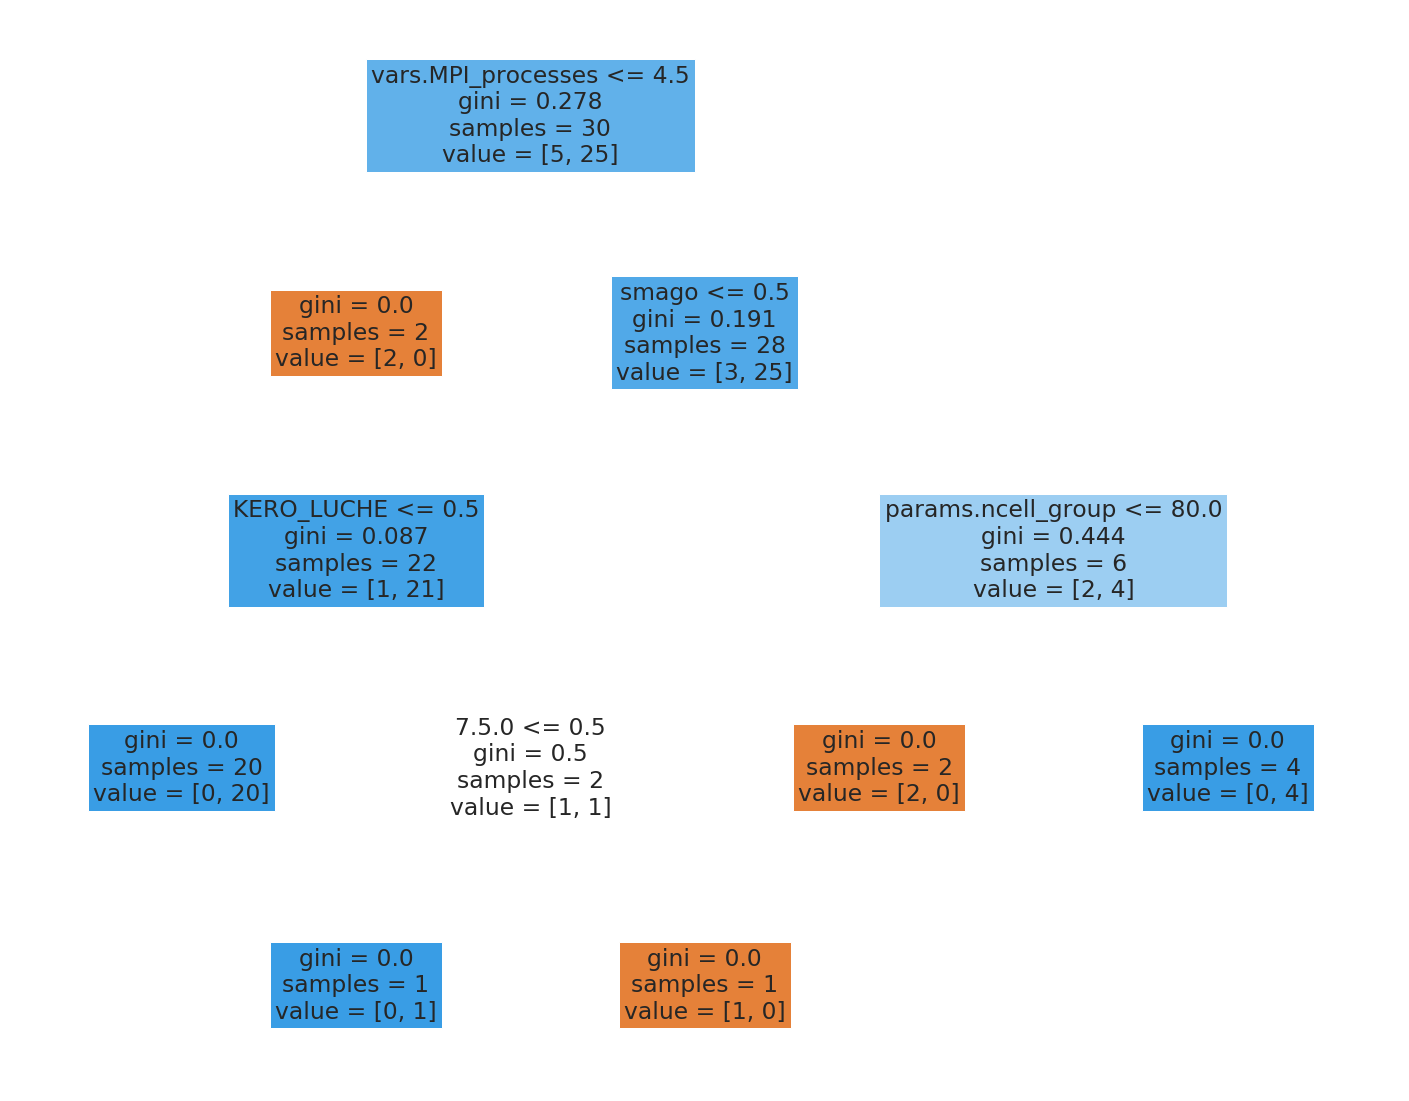

In [125]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtree, 
                   feature_names=X.columns, 
                   filled=True)